# MultiRoom RL Agent - Dueling DQN implementation
Using Dueling DQN RL technique, Train an agent to navigate through he rooms and doors of the MultiRoom environment.

---




<img src="https://raw.githubusercontent.com/Farama-Foundation/Minigrid/master/minigrid-text.png" width="400" height="auto">

- MiniGrid is designed to test and benchmark reinforcement learning algorithms, offering a diverse range of tasks with varying levels of complexity.

- MiniGrid environments are built around the concept of a partially observable, grid-based world where an agent operates to achieve predefined objectives.

- Specificly, the **Multiroom** environment is a grid-based environment where the agent must navigate through a series of rooms to reach a goal.

- Official documentation: https://minigrid.farama.org/environments/minigrid/MultiRoomEnv/

# Imports & Prerequisits

## Installs

In [ ]:
%%capture
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gymnasium
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install -U --no-cache-dir gdown --pre
!pip install minigrid
!wget -q https://www.dropbox.com/scl/fi/jhkb2y3jw8wgin9e26ooc/MiniGrid-MultiRoom-N6-v0_vid.mp4?rlkey=qtkrmmbk9aiote5z7w4bx6ixi&st=zbr4gk21&dl=1 -O content/MiniGrid-MultiRoom-N6-v0_vid.mp4


## Imports

In [ ]:
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay
import pyvirtualdisplay
import IPython
import base64
import gymnasium
import minigrid
from minigrid.wrappers import RGBImgObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper, FullyObsWrapper, RGBImgPartialObsWrapper
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

In [ ]:
# Constants for the environemnt configuration do no change the values
highlight = False
render_mode = "rgb_array"

# **MultiRoom Default Environment**

In the MultiRoomEnv environment, two key mechanisms, **done** and **truncated**, are used to signify the end of an episode. These mechanisms are essential for managing the flow of training and providing valuable feedback about the agent's performance.


### `done` & `truncated`
- The done flag is set to True when the agent successfully reaches the goal.
- It indicates the successful termination of the episode, meaning the agent has completed the task.
- Example scenario: The agent navigates through all the rooms and reaches the green goal square in the final room.
- The truncated flag is used to terminate an episode when a predefined condition is met, such as exceeding the maximum number of steps allowed.
- It does not necessarily indicate success or failure, but rather ensures that episodes do not run indefinitely.
- Example scenario: The agent fails to reach the goal within the allowed number of steps, and the episode ends prematurely.
- **Pay Attention!** - Each time the environment is reset, the configuration of the rooms is randomized. This variability should be carefully considered during training, as resetting the environment every time the **max_step** limit is reached can make it challenging for the agent to learn effectively.
- Additionally, note that the **max_step** parameter is defined as the number of rooms multiplied by 20.

### `Action Space`
- Minigrid uses a discrete action space, which means the agent can only take a limited set of actions, placeholder of 0-6 indexes.
- The default MultiRoom action space is defined as follows:
<br>
action_dict = {
    <br>
0 : 'turn_left',
<br>
1 : 'turn_right',
<br>
2 : 'move_forward',
<br>
3 : 'unused',
<br>
4 : 'unused',
<br>
5 : 'toggle_door',
<br>
6 : 'unused'
}

### `Rewards`
- the default reward for the MultiRoom environment is defined as follows:
<br>
‘1 - 0.9 * (step_count / max_steps)’ is given for success, and ‘0’ for failure.
<br>
Using the RewardShaper - we will modify the reward function to provide a more structured reward signal.

### `Wrappers for Observations`:
**ImgObsWrapper**
- The **ImgObsWrapper** converts the observation from its default dictionary format into a single image array.
- By default, observations in MiniGrid are returned as a dictionary containing both image data and other optional keys (e.g., mission strings). This wrapper extracts only the image component for simplicity.

**RGBImgPartialObsWrapper**
- This wrapper provides a **partial view of the environment**, but instead of limiting it to a fixed field of view, it shows the **entire visible content of the current room** from the agent's position to the walls in the direction the agent is facing.
- The observation dynamically updates as the agent moves or turns, allowing it to see the layout of the room but not beyond its walls or through closed doors.
- This introduces the challenge of **partial observability across multiple rooms**, as the agent must explore and navigate to new rooms to gather more information about the environment.

### `Initialize different environments`
there are 3 different environments that can be initialized:
- **MiniGrid-MultiRoom-N2-S4-v0** - 2 small rooms
- **MiniGrid-MultiRoom-N4-S5-v0** - 6 small rooms
- **MiniGrid-MultiRoom-N6-v0** - 6 large rooms
<br>
The number of rooms and starting positions are randomized each time the environment is reset.
<br>
It is recommended to start with the **MiniGrid-MultiRoom-N2-S4-v0** environment, and then move to the other environments as the agent's performance improves.

# Playground env
test observation, wrappers & action space

In [ ]:
from PIL import Image

def plot_obs(obs, env):
  obs = obs[:,:,1]
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  image = Image.fromarray(obs)
  image.save("partial_obs.png")

  image = Image.fromarray(env.render())
  image.save("full_obs.png")

  axs[1].imshow(obs)
  axs[1].title.set_text(f'RGBImgPartialObsWrapper, shape: {obs.shape}')
  axs[0].imshow(env.render())
  axs[0].title.set_text(f'Full state')
  plt.show()

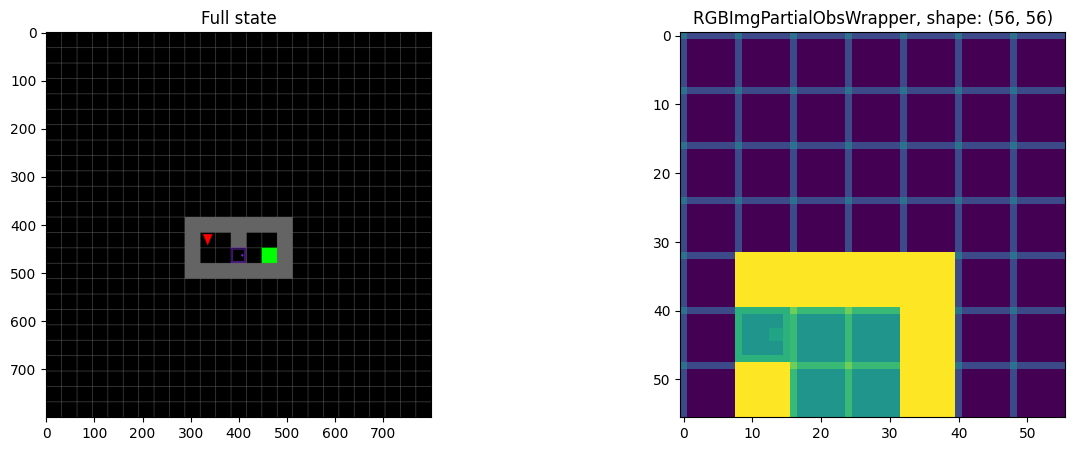

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
obs, _ = env.reset()

plot_obs(obs, env)

In [ ]:
env.unwrapped.agent_dir

1

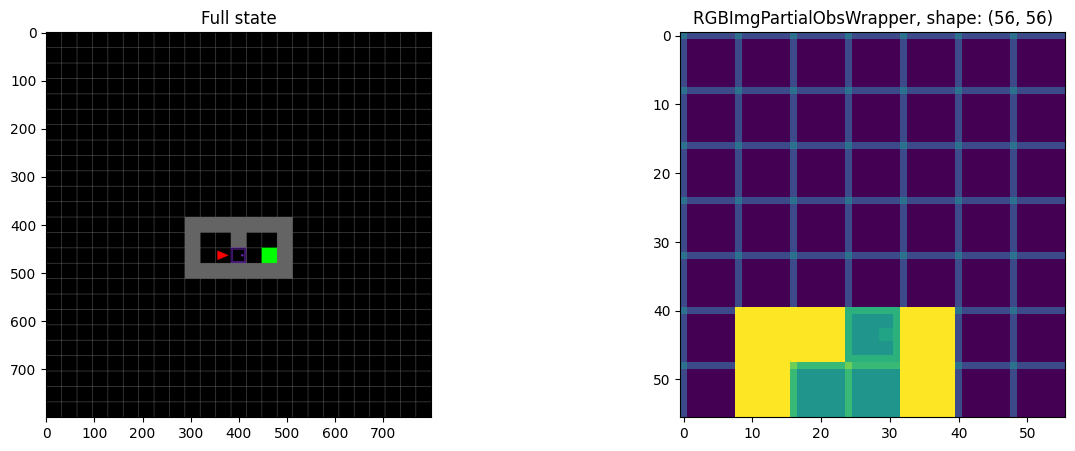

In [ ]:
obs, reward, done, truncated  , _ = env.step(2)
obs, reward, done, truncated  , _ = env.step(0)
obs, reward, done, truncated  , _ = env.step(2)


plot_obs(obs, env)

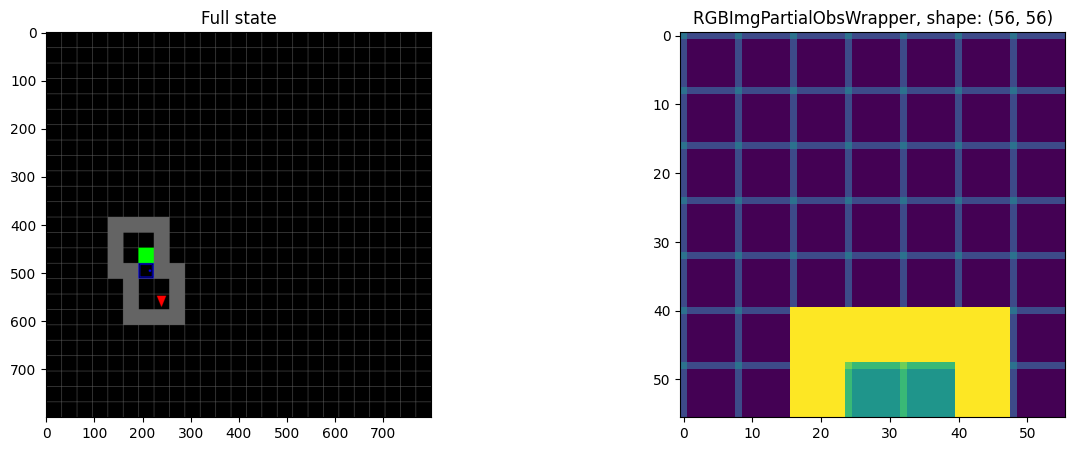

In [ ]:
state, _ = duelingdqn_agent.env.reset()

plot_obs(state, duelingdqn_agent.env)

In [ ]:
# obs, reward, done, truncated  , _ = duelingdqn_agent.env.step(2)
state, reward, done, truncated  , _ = duelingdqn_agent.env.step(1)
# state, reward, done, truncated  , _ = duelingdqn_agent.env.step(1)

In [ ]:
reward

0.82

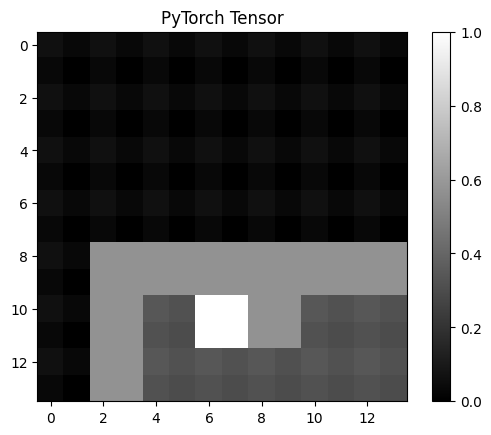

In [ ]:
prep_state = duelingdqn_agent.preprocess(state)


plt.imshow(prep_state.numpy()[0,:,:], cmap='gray')
plt.title('PyTorch Tensor')
plt.colorbar()
plt.show()

In [ ]:
# prompt: function - load file to drive specific dir

def load_file_to_drive(file_path, destination_dir):
  """Loads a file from the Colab runtime to a specified directory in Google Drive.

  Args:
    file_path: The path to the file in the Colab runtime.
    destination_dir: The path to the directory in Google Drive.
  """
  from google.colab import drive
  import shutil
  import os

  # Mount Google Drive if it's not already mounted
  if not os.path.exists('/content/drive/My Drive'):
    drive.mount('/content/drive')

  # Create the destination directory if it doesn't exist
  destination_path = os.path.join('/content/drive/My Drive', destination_dir)
  os.makedirs(destination_path, exist_ok=True)

  # Copy the file to the destination
  try:
    shutil.copy(file_path, destination_path)
    print(f"File '{file_path}' successfully copied to '{destination_path}'")
  except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")


# Support functions

### Embed video rendering

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

### Mount to google drive
save files to drive, in case of google colab shutdowns

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Ploting training results
Functions for visualizing training progress by plotting rewards and steps over episodes


In [ ]:
# prompt:  - as a function - plot rewards & steps, and add running average of 25 last episodes

import numpy as np
import matplotlib.pyplot as plt

def plot_rewards_and_steps(rewards, steps):
    # Calculate the running average of the last 200 episodes for rewards
    window_size_rewards = 200
    running_average_rewards = np.convolve(rewards, np.ones(window_size_rewards), 'valid') / window_size_rewards

    # Calculate the running average of the last 200 episodes for steps
    window_size_steps = 200
    running_average_steps = np.convolve(steps, np.ones(window_size_steps), 'valid') / window_size_steps

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plot rewards
    axs[0].plot(rewards, label='Episode Reward')
    axs[0].plot(range(window_size_rewards - 1, len(rewards)), running_average_rewards, label=f'Running Average ({window_size_rewards} Episodes)')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Reward')
    axs[0].set_title('Episode Rewards with Running Average')
    axs[0].legend()
    axs[0].grid(True)

    # Plot steps
    axs[1].plot(steps, label='Steps per Episode')
    axs[1].plot(range(window_size_steps - 1, len(steps)), running_average_steps, label=f'Running Average ({window_size_steps} Episodes)')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps per Episode with Running Average')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()



# Agent


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Check if CUDA is available

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
import random
import numpy as np
import cv2
import gym
from collections import deque
import pickle
from tqdm import tqdm
import time
import datetime
import h5py
import os

Using device: cuda


## ReplayBuffer
- The ReplayBuffer class implements experience replay, which is a key component of DQN algorithms.
- It stores transitions (state, action, reward, next_state, done) and allows random sampling
- for training, helping to break correlations in sequential data and improve learning stability.


In [ ]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        """Append experience tuple to the buffer"""
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """Sample a batch and move tensors to the correct device"""
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)

        # Convert to tensors and move to device
        return (
            torch.tensor(np.array(states), dtype=torch.float32).to(device),
            torch.tensor(actions, dtype=torch.int64).to(device),
            torch.tensor(rewards, dtype=torch.float32).to(device),
            torch.tensor(np.array(next_states), dtype=torch.float32).to(device),
            torch.tensor(dones, dtype=torch.float32).to(device),
        )

    def __len__(self):
        return len(self.buffer)


## Reward shaper
- The RewardShaper class is used to shape the reward signal for the agent.
- It is used to encourage the agent to explore the environment and open doors.
- It is also used to penalize the agent for repeated actions and for not opening doors.
- It is also used to reward the agent for moving forward after a door has been opened.


In [ ]:
from collections import deque
import numpy as np

# Define directions (Up, Right, Down, Left)
DIRECTIONS = [(0, -1), (1, 0), (0, 1), (-1, 0)]

class RewardShaper:
    def __init__(self):
        self.reset()  # Initialize with a reset

    def reset(self):
        """Reset the reward shaper for a new episode."""
        self.last_actions = deque(maxlen=10)   # Track recent actions
        self.last_state = None                 # Reset last observed state
        self.door_opened = deque(maxlen=10)    # Reset door open state tracker
        self.last_door_toggle = None           # Reset last door toggle state
        self.doors = {}                        # Track doors by location

        self.updating_grid = np.zeros((50,50)) # double the size, start in middle, so garentee edge issues
        self.direction = 0  # Start facing "Up" (index in DIRECTIONS)
        self.x_pos, self.y_pos = (25,25) # start in middle
        self.updating_grid[self.y_pos, self.x_pos] = 1

    def step(self, action, previous_state, next_state):
        """Perform a single step in the environment."""
        if action == 0:  #"turn_left"
            self.direction = (self.direction - 1) % 4

        elif action == 1:   #"turn_right"
            self.direction = (self.direction + 1) % 4

        elif action == 2:   #"step_forward"
            if self.check_state_change(previous_state, next_state):
              dx, dy = DIRECTIONS[self.direction]
              self.x_pos, self.y_pos = self.x_pos + dx, self.y_pos + dy

            else:
              pass # wall \ closed door

        elif action == 3:  #"toggle"
            pass

        # add 1 to location in matrix
        self.updating_grid[self.y_pos, self.x_pos] += 1

    def return_one_cell_infront_position(self):
        dx, dy = DIRECTIONS[self.direction]
        cell_infront_x = self.x_pos + dx
        cell_infront_y = self.y_pos + dy
        return cell_infront_x, cell_infront_y

    def add_new_door(self, agent_pos):
        """Add a newly found door if not already tracked."""
        if agent_pos not in self.doors:
            self.doors[agent_pos] = {'open': False, 'toggled': False}

    def check_state_change(self, previous_state, next_state):
        """Check if the agent's observation has changed."""
        diff = np.abs(next_state[:, :, 1] - previous_state[:, :, 1])
        threshold = 10
        if np.sum(diff) > threshold:
          return True
        else:
          return False

    def reward_shaping(self, action, reward, previous_state, next_state, env, done):
        """Apply improved reward shaping to the MultiRoom environment."""
        # Get agent's position and direction
        self.step(action, previous_state, next_state)
        agent_pos = (self.x_pos, self.y_pos)

        # Track visited positions for exploration reward
        if self.updating_grid[self.y_pos, self.x_pos] == 1:
            reward += 0.05  # Reward for exploring new locations

        # Check if the agent is facing a door and toggling it
        if action == 3:
            if check_state_change(previous_state, next_state):
                cell_infront_xy_tuple = self.return_one_cell_infront_position()
                if cell_infront_xy_tuple not in self.doors:
                    self.add_new_door(cell_infront_xy_tuple)
                door = self.doors[cell_infront_xy_tuple]
                if door['open']:
                    reward -= 0.3
                    door['open'] = False
                else:
                    reward += 0.5
                    door['open'] = True
                door['toggled'] = True

            # Penalty for repeated toggling
            if list(self.last_actions)[-3:] == [3] * 3:
                reward -= 0.2  # Discourage repeated toggling

        # Reward for moving forward after door opens
        if action == 2:
            if any(door['open'] for door in self.doors.values()):
                reward += 0.2

        # Penalize repeated actions (like spinning in place)
        if len(self.last_actions) >= 3 and len(set(list(self.last_actions)[-3:])) == 1:
            reward -= 0.1  # Repeated action penalty

        if done:
          reward += 3

        # Update the action history
        self.last_actions.append(action)

        return reward

    def door_interactions_summary(self):
        opened = sum(1 for door in self.doors.values() if door['open'])
        # print(f"🚪Doors Opened: {opened}")
        return opened


## Basic DQN model (archived)
modified to use DuelingDQN

In [ ]:
class DQN(nn.Module):
    def __init__(self, action_dim):
        super(DQN, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1),  # (1, 14, 14) → (16, 12, 12)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1),  # (16, 12, 12) → (32, 10, 10)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1),  # (32, 10, 10) → (64, 8, 8)
            nn.ReLU(),
            nn.Flatten()
        )

        # Dynamically compute fc_input_size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 14, 14)  # Simulate a single input image
            dummy_output = self.cnn(dummy_input)
            self.fc_input_size = dummy_output.view(-1).shape[0]
            print(f"Computed fc_input_size: {self.fc_input_size}")  # Debugging print

        self.fc = nn.Sequential(
            nn.Linear(self.fc_input_size, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)  # Output Q-values for each action
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x

dqn = DQN(4)


Computed fc_input_size: 4096


## DuelingDQN model
- The DuelingDQN model is a modified version of the DQN model.
- It is used to improve the learning stability and convergence of the DQN algorithm.
- It is also used to reduce the variance of the Q-values, and improve the exploration of the agent.


In [ ]:
class DuelingDQN(nn.Module):
    def __init__(self, action_dim):
        super(DuelingDQN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=1),  # Only green channel
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_value = nn.Sequential(
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 1)  # State value
        )
        self.fc_advantage = nn.Sequential(
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, action_dim)  # Action advantage
        )

    def forward(self, x):
        features = self.cnn(x)
        value = self.fc_value(features)
        advantage = self.fc_advantage(features)
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        return q_values


## RL Agent
- The DQNAgent class is the main class for the DuelingDQN agent.
- It is used to train the DuelingDQN model and test the DuelingDQN model.
- includes functions to save & load the DuelingDQN model.




In [ ]:
class DQNAgent():
  def __init__(self, model_type, torch_device, gamma, learning_rate, decay_rate, env, total_episodes):
    self.env = env

    self.model = model_type.to(torch_device)
    self.target_model = model_type.to(torch_device)

    self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
    self.buffer = ReplayBuffer(10000)
    self.batch_size = 64
    self.target_update = 1000

    self.gamma = gamma
    self.learning_rate = learning_rate
    self.total_episodes = total_episodes

    self.reward_shaper = RewardShaper()

    self.epsilon_start = 1.0
    self.epsilon_min = 0.03
    self.epsilon_decay = decay_rate
    self.epsilon = self.epsilon_start # current epsilon

    self.steps = []
    self.rewards = []
    self.doors_opened = []

    self.last_episode = 0

    # translate form 7 actions to only 4 relevant [0-left turn, 1-right turn, 2-move forward, 3-toggle_door]
    self.translate_actions = {'0' : 0, '1' : 1, '2' : 2, '3' : 5}

  def preprocess(self, state):
    """Extract the green channel and resize to (14,14)."""
    state = state[:, :, 1]  # Extract green channel
    state = cv2.resize(state, (14, 14), interpolation=cv2.INTER_AREA)  # Downscale

    return torch.tensor(state, dtype=torch.float32).unsqueeze(0) / 255.0  # Shape: [1, 14, 14]

  def select_action(self, state):
    if isinstance(state, np.ndarray):
        state = torch.tensor(state, dtype=torch.float32).to(device).unsqueeze(0)

    if random.random() < self.epsilon:
        action = np.random.randint(0, 4)
    else:
        with torch.no_grad():
            action = self.model(state).argmax().item()

    return action


  def update_model(self):
    if len(self.buffer) < self.batch_size:
        return

    states, actions, rewards, next_states, dones = self.buffer.sample(self.batch_size)

    # Ensure tensors have correct dimensions before feeding to CNN
    states = states.view(self.batch_size, 1, 14, 14).to(device)
    next_states = next_states.view(self.batch_size, 1, 14, 14).to(device)

    actions = actions.to(device)
    rewards = rewards.to(device)
    dones = dones.to(device).float()  # Convert to float for multiplication

    # Compute current Q-values
    q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)

    # Compute target Q-values using the Bellman equation
    with torch.no_grad():
        next_q_values = self.target_model(next_states).max(1)[0]
        target_q_values = rewards + (self.gamma * next_q_values * (1 - dones))

    # Compute loss and optimize
    loss = nn.MSELoss()(q_values, target_q_values)
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()


  def train(self):
    for episode in tqdm(range(self.last_episode, self.total_episodes), initial=self.last_episode, total=self.total_episodes):
        state, _ = self.env.reset()
        self.reward_shaper.reset()

        total_reward = 0
        truncated = False
        step = 0

        while not truncated:
            # preprocess state
            state_preprocessed = self.preprocess(state).to(device).unsqueeze(0)

            # select action
            action = self.select_action(state_preprocessed)

            # run next step in the enviorments, after taken action
            next_state, reward, done, truncated, _ = self.env.step(self.translate_actions[str(action)])

            # reward_shaping
            reward = self.reward_shaper.reward_shaping(action, reward, state, next_state, self.env, done)

            # preprocess o next_tate for the model
            next_state_preprocessed = self.preprocess(next_state).to(device).unsqueeze(0)  # Ensure correct shape [1, 1, 14, 14]

            # Store experience in replay buffer
            self.buffer.push(state_preprocessed.squeeze(0).cpu().numpy(), action, reward, next_state_preprocessed.squeeze(0).cpu().numpy(), done)

            # Train the model
            self.update_model()

            # updating next steps & total reward
            state = next_state
            total_reward += reward

            step += 1

            if done:
                break

        self.steps.append(step)
        self.rewards.append(total_reward)
        self.doors_opened.append(self.reward_shaper.door_interactions_summary())

        # update target model
        if episode % self.target_update == 0:
            self.target_model.load_state_dict(self.model.state_dict())

        # epsilon update
        # if episode == (int(self.total_episodes*0.7)):
        #   self.epsilon = 0.2
        # else:
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

        # track improvement:
        if episode % 1000 == 0:
          avg_reward = np.mean(self.rewards[-1000:])
          avg_steps = np.mean(self.steps[-1000:])
          avg_number_of_doors_opened = np.mean(self.doors_opened[-1000:])
          print(f"Episode {episode}: Average Reward = {avg_reward}, Average Steps = {avg_steps}, Average n open doors = {avg_number_of_doors_opened}")

        if episode % 5000 == 0:
          self.save_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment', episode)

  # save checkpoint to h5 file & model to pkl file
  def save_checkpoint(self, dir, episode):
    timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")

    model_filename = f'dualdqn_model_{timestamp}.pkl'
    model_full_path = os.path.join(dir, model_filename)

    h5_file_name = f'dualdqn_checkpoint_{timestamp}.h5'
    h5_full_path = os.path.join(dir, h5_file_name)

    with open(model_full_path, "wb") as f:
        pickle.dump(self.model.state_dict(), f)

    with h5py.File(h5_full_path, 'a') as f:
      # Save arrays
      f.create_dataset('rewards', data=self.rewards)
      f.create_dataset('steps', data=self.steps)
      f.create_dataset('doors_opened', data=self.doors_opened)

      # Save metadata
      f.attrs['epsilon'] = self.epsilon
      f.attrs['last_episode'] = episode
      f.attrs['model_path'] = model_full_path

    print(f"Checkpoint saved: {h5_full_path} and {model_filename}")
    return h5_full_path

  # load checkpoint from h5 file & model from pkl file
  def load_checkpoint(self, h5file_path):
    with h5py.File(h5file_path, 'r') as f:
        self.rewards = f['rewards'][:].tolist()
        self.steps = f['steps'][:].tolist()
        self.doors_opened = f['doors_opened'][:].tolist()
        self.epsilon = f.attrs['epsilon']
        self.last_episode = f.attrs['last_episode']
        model_path = f.attrs['model_path']
        print(f"Checkpoint loaded from {h5file_path}")

    with open(model_path, "rb") as f:
        self.model.load_state_dict(pickle.load(f))  # Set to evaluation mode
        print(f"Model loaded from {model_path}")

  # save model to pkl file
  def save_model(self, filename):
    """Save the trained model to a pickle file."""
    with open(filename, "wb") as f:
        pickle.dump(self.model.state_dict(), f)
    print(f"Model saved to {filename}")

  # load model from pkl file
  def load_model(self, filename):
    """Load the trained model from a pickle file."""
    with open(filename, "rb") as f:
        self.model.load_state_dict(pickle.load(f))
    print(f"Model loaded from {filename}")

  # test model on env and create video of the test
  def test_model(self, test_num_episodes=10, action_verbose=False, video_name_suffix=''):
    """Run the trained model in the environment for evaluation."""
    self.model.eval()  # Ensure the model is in evaluation mode
    video_filename = f'test_video{video_name_suffix}.mp4'

    for episode in range(test_num_episodes):
      with imageio.get_writer(video_filename, fps=16) as video:
        state, _ = self.env.reset()
        state = self.preprocess(state).to(device).unsqueeze(0)
        # state = torch.tensor(state, dtype=torch.float).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 14, 14)
        total_reward = 0
        truncated = False
        step = 0

        while not truncated:
            with torch.no_grad():
                action = self.model(state).argmax().item()  # Select best action
                if action_verbose:
                  print(f"Action: {action}")

            next_state, reward, done, truncated  , _ = self.env.step(self.translate_actions[str(action)])
            next_state = self.preprocess(next_state).to(device).unsqueeze(0)  # Ensure shape [1, 1, 14, 14]
            # next_state = torch.tensor(next_state, dtype=torch.float).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 14, 14)

            state = next_state
            video.append_data(env.render())
            total_reward += reward
            step += 1

            if done:
                break

        print(f"Test Episode {episode+1}/{test_num_episodes}, Total Reward: {total_reward}, Total Steps: {step}")


# Training

## 2 small rooms env

### first attempt

In [ ]:
# assign agent
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 60000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)

  0%|          | 2/60000 [00:00<1:42:36,  9.74it/s]

Episode 0: Average Reward = 0.885


  8%|▊         | 5001/60000 [20:57<3:45:51,  4.06it/s]

Episode 5000: Average Reward = 1.7070250000000002


 17%|█▋        | 10001/60000 [41:32<3:29:33,  3.98it/s]

Episode 10000: Average Reward = 2.5062750000000005


 25%|██▌       | 15001/60000 [1:02:33<3:08:04,  3.99it/s]

Episode 15000: Average Reward = 3.1386500000000006


 33%|███▎      | 20001/60000 [1:23:46<2:52:21,  3.87it/s]

Episode 20000: Average Reward = 3.791875000000002


 42%|████▏     | 25001/60000 [1:45:29<3:08:39,  3.09it/s]

Episode 25000: Average Reward = 3.800625000000001


 50%|█████     | 30001/60000 [2:07:47<2:11:10,  3.81it/s]

Episode 30000: Average Reward = 4.084550000000001


 58%|█████▊    | 35001/60000 [2:30:20<1:49:12,  3.82it/s]

Episode 35000: Average Reward = 4.289925


 67%|██████▋   | 40001/60000 [2:53:08<1:29:48,  3.71it/s]

Episode 40000: Average Reward = 4.38645


 75%|███████▌  | 45001/60000 [3:15:46<1:09:30,  3.60it/s]

Episode 45000: Average Reward = 4.3595500000000005


 83%|████████▎ | 50001/60000 [3:38:32<51:35,  3.23it/s]

Episode 50000: Average Reward = 4.450450000000001


 92%|█████████▏| 55001/60000 [4:01:30<24:34,  3.39it/s]

Episode 55000: Average Reward = 4.498400000000001


100%|██████████| 60000/60000 [4:24:54<00:00,  3.77it/s]


current_epsilon: 0.0813161681526625
Model saved to /content/dqn_model_13022025_135021.pkl
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_13022025_135021.pkl


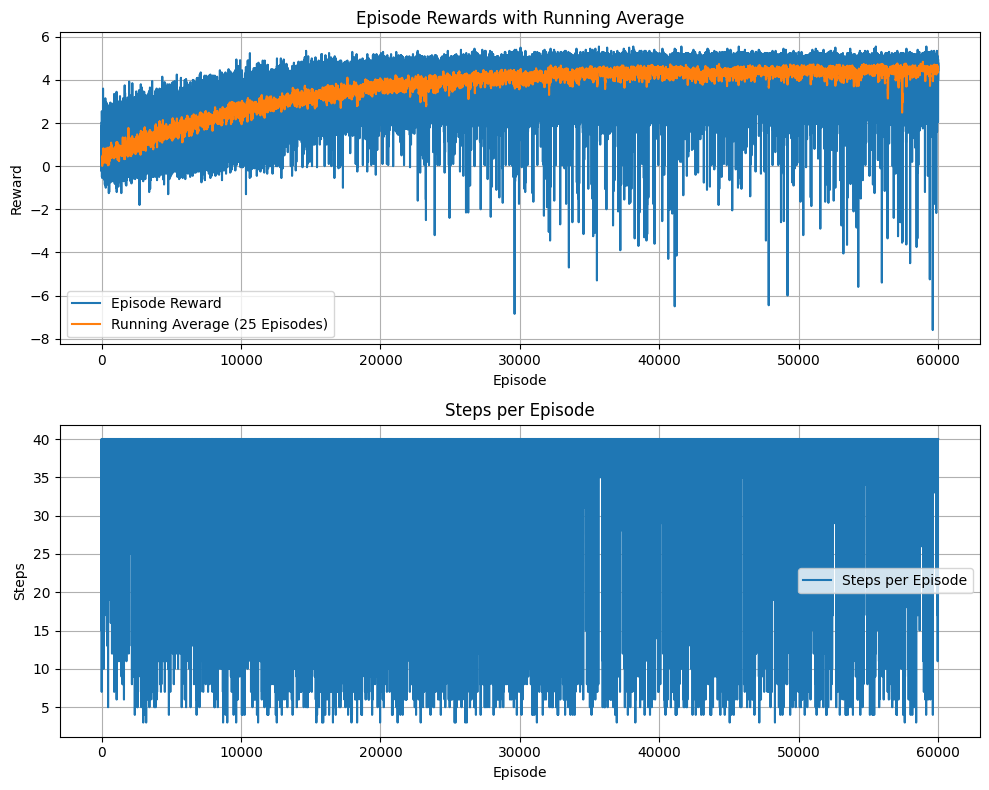

In [ ]:
# train model
duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

### attempt after adding 'done' reward of +1, didnt converge to wining point

In [ ]:
# assign agent
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 15000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)

  0%|          | 2/15000 [00:00<22:32, 11.09it/s]

Episode 0: Average Reward = 0.4


 33%|███▎      | 5001/15000 [20:50<48:44,  3.42it/s]

Episode 5000: Average Reward = 1.8943750000000004


 67%|██████▋   | 10001/15000 [41:18<20:23,  4.09it/s]

Episode 10000: Average Reward = 2.6394000000000006


100%|██████████| 15000/15000 [1:03:50<00:00,  3.92it/s]


current_epsilon: 0.15971033091025938
Model saved to /content/dqn_model_13022025_150336.pkl
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_13022025_150336.pkl


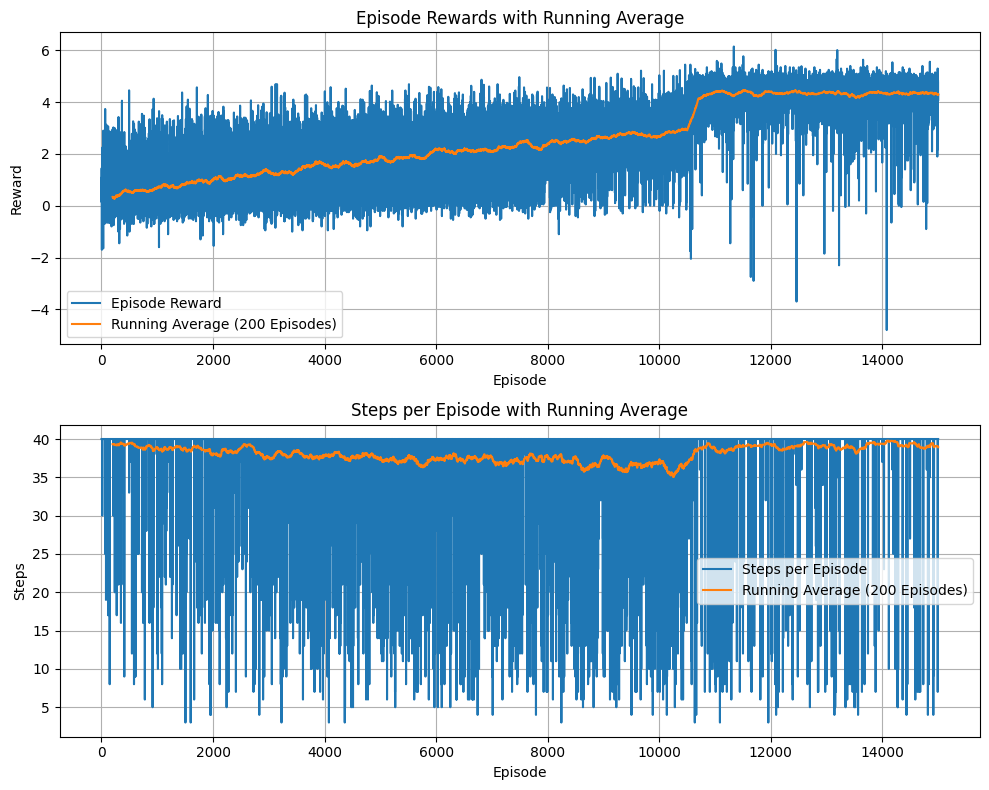

In [ ]:
# train model
duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

### attempt after adding 'done' reward of +2, didnt converge to wining point yet

In [ ]:
# assign agent
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 60000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)

  0%|          | 0/60000 [00:00<?, ?it/s]

Episode 0: Average Reward = 0.4, Average Steps = 40.0, Average n open doors = 1.0


  0%|          | 1/60000 [00:00<11:19:54,  1.47it/s]

Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_191727.h5 and dualdqn_model_20022025_191727.pkl


  2%|▏         | 1001/60000 [04:05<3:56:36,  4.16it/s]

Episode 1000: Average Reward = 0.8055549999999999, Average Steps = 38.702, Average n open doors = 0.395


  3%|▎         | 2002/60000 [08:07<3:15:51,  4.94it/s]

Episode 2000: Average Reward = 1.1032425000000001, Average Steps = 38.407, Average n open doors = 0.502


  5%|▌         | 3001/60000 [12:08<3:47:58,  4.17it/s]

Episode 3000: Average Reward = 1.38284, Average Steps = 38.176, Average n open doors = 0.615


  7%|▋         | 4001/60000 [16:07<4:17:44,  3.62it/s]

Episode 4000: Average Reward = 1.8142525, Average Steps = 37.571, Average n open doors = 0.746


  8%|▊         | 5001/60000 [20:02<4:23:39,  3.48it/s]

Episode 5000: Average Reward = 2.1614625000000003, Average Steps = 36.855, Average n open doors = 0.841
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_193729.h5 and dualdqn_model_20022025_193729.pkl


 10%|█         | 6001/60000 [23:53<4:00:01,  3.75it/s]

Episode 6000: Average Reward = 2.4818350000000002, Average Steps = 36.154, Average n open doors = 0.947


 12%|█▏        | 7001/60000 [27:39<3:26:26,  4.28it/s]

Episode 7000: Average Reward = 2.7848575, Average Steps = 35.133, Average n open doors = 0.998


 13%|█▎        | 8001/60000 [31:29<3:33:46,  4.05it/s]

Episode 8000: Average Reward = 3.0128325000000005, Average Steps = 34.903, Average n open doors = 1.076


 15%|█▌        | 9003/60000 [35:04<2:15:45,  6.26it/s]

Episode 9000: Average Reward = 3.4267, Average Steps = 32.76, Average n open doors = 1.132


 17%|█▋        | 10001/60000 [38:40<3:26:01,  4.04it/s]

Episode 10000: Average Reward = 3.5194400000000003, Average Steps = 33.176, Average n open doors = 1.128
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_195608.h5 and dualdqn_model_20022025_195608.pkl


 18%|█▊        | 11001/60000 [42:08<2:32:35,  5.35it/s]

Episode 11000: Average Reward = 3.735335, Average Steps = 31.714, Average n open doors = 1.167


 20%|██        | 12001/60000 [45:27<2:29:08,  5.36it/s]

Episode 12000: Average Reward = 3.941605, Average Steps = 30.342, Average n open doors = 1.18


 22%|██▏       | 13001/60000 [48:39<2:24:58,  5.40it/s]

Episode 13000: Average Reward = 4.120092500000001, Average Steps = 29.307, Average n open doors = 1.196


 23%|██▎       | 14001/60000 [51:35<2:25:02,  5.29it/s]

Episode 14000: Average Reward = 4.300870000000001, Average Steps = 26.668, Average n open doors = 1.166


 25%|██▌       | 15001/60000 [54:19<2:01:03,  6.20it/s]

Episode 15000: Average Reward = 4.4649125000000005, Average Steps = 24.875, Average n open doors = 1.157
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_201146.h5 and dualdqn_model_20022025_201146.pkl


 27%|██▋       | 16001/60000 [56:44<2:16:41,  5.36it/s]

Episode 16000: Average Reward = 4.621770000000001, Average Steps = 21.968, Average n open doors = 1.145


 28%|██▊       | 17002/60000 [59:10<1:27:19,  8.21it/s]

Episode 17000: Average Reward = 4.61456, Average Steps = 21.944, Average n open doors = 1.15


 30%|███       | 18003/60000 [1:01:27<1:06:00, 10.60it/s]

Episode 18000: Average Reward = 4.6845225, Average Steps = 20.699, Average n open doors = 1.145


 32%|███▏      | 19004/60000 [1:03:36<1:15:05,  9.10it/s]

Episode 19000: Average Reward = 4.802217499999999, Average Steps = 19.557, Average n open doors = 1.131


 33%|███▎      | 20002/60000 [1:05:43<55:45, 11.96it/s]

Episode 20000: Average Reward = 4.759605, Average Steps = 18.962, Average n open doors = 1.137
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_202310.h5 and dualdqn_model_20022025_202310.pkl


 35%|███▌      | 21001/60000 [1:07:39<1:05:45,  9.88it/s]

Episode 21000: Average Reward = 4.84988, Average Steps = 17.432, Average n open doors = 1.137


 37%|███▋      | 22002/60000 [1:09:37<1:01:25, 10.31it/s]

Episode 22000: Average Reward = 4.776105, Average Steps = 17.722, Average n open doors = 1.124


 38%|███▊      | 23000/60000 [1:11:28<59:17, 10.40it/s]  

Episode 23000: Average Reward = 4.830655, Average Steps = 16.662, Average n open doors = 1.137


 40%|████      | 24000/60000 [1:13:14<1:14:25,  8.06it/s]

Episode 24000: Average Reward = 4.8483975, Average Steps = 15.569, Average n open doors = 1.109


 42%|████▏     | 25001/60000 [1:15:00<1:23:40,  6.97it/s]

Episode 25000: Average Reward = 4.907887500000001, Average Steps = 15.645, Average n open doors = 1.122
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_203227.h5 and dualdqn_model_20022025_203227.pkl


 43%|████▎     | 26003/60000 [1:16:41<41:44, 13.57it/s]

Episode 26000: Average Reward = 4.899520000000001, Average Steps = 15.028, Average n open doors = 1.125


 45%|████▌     | 27002/60000 [1:18:17<42:06, 13.06it/s]

Episode 27000: Average Reward = 4.8703, Average Steps = 14.18, Average n open doors = 1.11


 47%|████▋     | 28004/60000 [1:19:49<38:47, 13.74it/s]

Episode 28000: Average Reward = 4.898925, Average Steps = 13.55, Average n open doors = 1.08


 48%|████▊     | 29003/60000 [1:21:19<34:03, 15.17it/s]

Episode 29000: Average Reward = 4.9010475, Average Steps = 13.389, Average n open doors = 1.098


 50%|█████     | 30000/60000 [1:22:44<44:43, 11.18it/s]

Episode 30000: Average Reward = 4.937985, Average Steps = 12.654, Average n open doors = 1.089
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_204012.h5 and dualdqn_model_20022025_204012.pkl


 52%|█████▏    | 31002/60000 [1:24:09<38:30, 12.55it/s]

Episode 31000: Average Reward = 4.942145, Average Steps = 12.438, Average n open doors = 1.092


 53%|█████▎    | 32001/60000 [1:25:30<30:10, 15.47it/s]

Episode 32000: Average Reward = 4.8719624999999995, Average Steps = 12.015, Average n open doors = 1.076


 55%|█████▌    | 33003/60000 [1:26:50<23:39, 19.02it/s]

Episode 33000: Average Reward = 4.9306125000000005, Average Steps = 11.735, Average n open doors = 1.05


 57%|█████▋    | 34004/60000 [1:28:11<25:20, 17.10it/s]

Episode 34000: Average Reward = 4.9207399999999994, Average Steps = 11.896, Average n open doors = 1.064


 58%|█████▊    | 35001/60000 [1:29:25<32:39, 12.76it/s]

Episode 35000: Average Reward = 4.9241975, Average Steps = 10.909, Average n open doors = 1.046
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_204652.h5 and dualdqn_model_20022025_204652.pkl


 60%|██████    | 36003/60000 [1:30:39<22:41, 17.62it/s]

Episode 36000: Average Reward = 4.913525, Average Steps = 10.87, Average n open doors = 1.049


 62%|██████▏   | 37003/60000 [1:31:51<32:55, 11.64it/s]

Episode 37000: Average Reward = 4.970855, Average Steps = 10.482, Average n open doors = 1.064


 63%|██████▎   | 38004/60000 [1:33:01<29:53, 12.27it/s]

Episode 38000: Average Reward = 4.953125, Average Steps = 10.27, Average n open doors = 1.053


 65%|██████▌   | 39002/60000 [1:34:11<24:08, 14.50it/s]

Episode 39000: Average Reward = 4.9199025, Average Steps = 10.211, Average n open doors = 1.049


 67%|██████▋   | 40001/60000 [1:35:18<26:20, 12.66it/s]

Episode 40000: Average Reward = 4.963785, Average Steps = 9.914, Average n open doors = 1.042
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_205246.h5 and dualdqn_model_20022025_205246.pkl


 68%|██████▊   | 41002/60000 [1:36:39<44:44,  7.08it/s]

Episode 41000: Average Reward = 4.9195325, Average Steps = 10.163, Average n open doors = 1.034


 70%|███████   | 42002/60000 [1:37:56<20:35, 14.57it/s]

Episode 42000: Average Reward = 4.924317500000001, Average Steps = 9.937, Average n open doors = 1.043


 72%|███████▏  | 43001/60000 [1:39:01<25:04, 11.30it/s]

Episode 43000: Average Reward = 4.958035, Average Steps = 9.374, Average n open doors = 1.038


 73%|███████▎  | 44001/60000 [1:40:09<23:11, 11.50it/s]

Episode 44000: Average Reward = 4.9120575, Average Steps = 9.893, Average n open doors = 1.043


 75%|███████▌  | 45001/60000 [1:41:16<17:02, 14.67it/s]

Episode 45000: Average Reward = 4.9029025, Average Steps = 9.751, Average n open doors = 1.027
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_205844.h5 and dualdqn_model_20022025_205844.pkl


 77%|███████▋  | 46004/60000 [1:42:21<15:02, 15.51it/s]

Episode 46000: Average Reward = 4.9256875, Average Steps = 9.385, Average n open doors = 1.028


 78%|███████▊  | 47004/60000 [1:43:24<11:00, 19.68it/s]

Episode 47000: Average Reward = 4.96503, Average Steps = 9.112, Average n open doors = 1.035


 80%|████████  | 48003/60000 [1:44:28<11:47, 16.96it/s]

Episode 48000: Average Reward = 4.9138825, Average Steps = 9.263, Average n open doors = 1.029


 82%|████████▏ | 49003/60000 [1:45:31<11:05, 16.52it/s]

Episode 49000: Average Reward = 4.942002499999999, Average Steps = 9.191, Average n open doors = 1.027


 83%|████████▎ | 50001/60000 [1:46:30<13:25, 12.41it/s]

Episode 50000: Average Reward = 4.993180000000001, Average Steps = 8.612, Average n open doors = 1.026
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_210357.h5 and dualdqn_model_20022025_210357.pkl


 85%|████████▌ | 51003/60000 [1:47:34<07:48, 19.21it/s]

Episode 51000: Average Reward = 4.925777500000001, Average Steps = 9.221, Average n open doors = 1.024


 87%|████████▋ | 52005/60000 [1:48:37<07:50, 16.99it/s]

Episode 52000: Average Reward = 4.91978, Average Steps = 9.092, Average n open doors = 1.028


 88%|████████▊ | 53005/60000 [1:49:38<05:36, 20.78it/s]

Episode 53000: Average Reward = 4.94504, Average Steps = 8.836, Average n open doors = 1.035


 90%|█████████ | 54002/60000 [1:50:38<06:30, 15.36it/s]

Episode 54000: Average Reward = 4.9578325, Average Steps = 8.843, Average n open doors = 1.024


 92%|█████████▏| 55002/60000 [1:51:38<04:36, 18.06it/s]

Episode 55000: Average Reward = 4.9512849999999995, Average Steps = 8.654, Average n open doors = 1.016
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_210905.h5 and dualdqn_model_20022025_210905.pkl


 93%|█████████▎| 56005/60000 [1:52:38<04:28, 14.89it/s]

Episode 56000: Average Reward = 4.936120000000001, Average Steps = 8.648, Average n open doors = 1.02


 95%|█████████▌| 57000/60000 [1:53:37<02:21, 21.23it/s]

Episode 57000: Average Reward = 4.952615, Average Steps = 8.606, Average n open doors = 1.018


 97%|█████████▋| 58003/60000 [1:54:36<01:43, 19.31it/s]

Episode 58000: Average Reward = 4.927452499999999, Average Steps = 8.511, Average n open doors = 1.015


 98%|█████████▊| 59003/60000 [1:55:31<00:49, 19.97it/s]

Episode 59000: Average Reward = 5.0259725, Average Steps = 8.059, Average n open doors = 1.017


100%|██████████| 60000/60000 [1:56:30<00:00,  8.58it/s]


Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_211357.h5 and dualdqn_model_20022025_211357.pkl


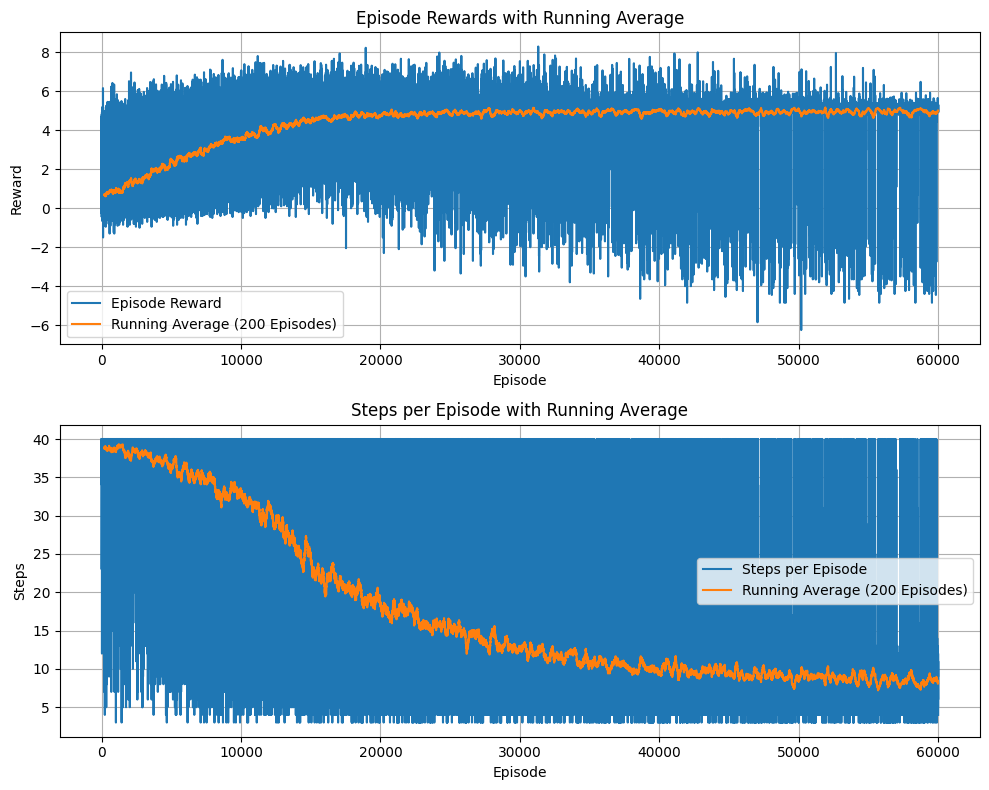

In [ ]:
# train model

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

## 6 small rooms env

In [ ]:
# assign agent
env = gymnasium.make("MiniGrid-MultiRoom-N4-S5-v0", render_mode=render_mode, highlight=highlight)

env.unwrapped.max_steps = 80
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 40000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)


In [ ]:
# train model

duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

  0%|          | 1/40000 [00:01<18:15:47,  1.64s/it]

Episode 0: Average Reward = -0.05, Average Steps = 80.0, Average n open doors = 0.0
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_15022025_183243.pkl


  3%|▎         | 1001/40000 [08:17<5:09:02,  2.10it/s]

Episode 1000: Average Reward = 1.4225000000000003, Average Steps = 80.0, Average n open doors = 0.59


  5%|▌         | 2001/40000 [16:38<4:58:08,  2.12it/s]

Episode 2000: Average Reward = 2.1345, Average Steps = 80.0, Average n open doors = 0.82


  8%|▊         | 3001/40000 [25:01<4:55:45,  2.08it/s]

Episode 3000: Average Reward = 2.633000000000001, Average Steps = 80.0, Average n open doors = 1.02


 10%|█         | 4001/40000 [33:30<5:04:33,  1.97it/s]

Episode 4000: Average Reward = 3.5855000000000006, Average Steps = 80.0, Average n open doors = 1.23


 13%|█▎        | 5001/40000 [41:55<4:39:39,  2.09it/s]

Episode 5000: Average Reward = 3.7750000000000012, Average Steps = 80.0, Average n open doors = 1.5


 15%|█▌        | 6001/40000 [50:19<5:12:11,  1.82it/s]

Episode 6000: Average Reward = 4.352500000000001, Average Steps = 80.0, Average n open doors = 1.42


 18%|█▊        | 7001/40000 [58:43<4:21:09,  2.11it/s]

Episode 7000: Average Reward = 4.709000000000002, Average Steps = 80.0, Average n open doors = 1.7


 20%|██        | 8001/40000 [1:07:09<4:20:23,  2.05it/s]

Episode 8000: Average Reward = 4.761000000000001, Average Steps = 80.0, Average n open doors = 1.58


 23%|██▎       | 9001/40000 [1:15:40<4:22:32,  1.97it/s]

Episode 9000: Average Reward = 5.384500000000002, Average Steps = 80.0, Average n open doors = 1.85


 25%|██▌       | 10001/40000 [1:24:12<4:26:33,  1.88it/s]

Episode 10000: Average Reward = 6.1635, Average Steps = 80.0, Average n open doors = 2.2
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_15022025_195655.pkl


 28%|██▊       | 11001/40000 [1:32:44<4:03:31,  1.98it/s]

Episode 11000: Average Reward = 5.482500000000003, Average Steps = 80.0, Average n open doors = 1.96


 30%|███       | 12001/40000 [1:41:16<3:49:03,  2.04it/s]

Episode 12000: Average Reward = 5.457000000000002, Average Steps = 80.0, Average n open doors = 1.86


 33%|███▎      | 13001/40000 [1:49:50<3:40:22,  2.04it/s]

Episode 13000: Average Reward = 5.912500000000001, Average Steps = 80.0, Average n open doors = 2.05


 35%|███▌      | 14001/40000 [1:58:24<4:07:10,  1.75it/s]

Episode 14000: Average Reward = 5.979000000000002, Average Steps = 80.0, Average n open doors = 2.09


 38%|███▊      | 15001/40000 [2:07:00<3:27:39,  2.01it/s]

Episode 15000: Average Reward = 5.668350000000001, Average Steps = 79.88, Average n open doors = 1.8


 40%|████      | 16001/40000 [2:15:37<3:36:45,  1.85it/s]

Episode 16000: Average Reward = 5.5150000000000015, Average Steps = 80.0, Average n open doors = 1.83


 43%|████▎     | 17001/40000 [2:24:14<3:08:30,  2.03it/s]

Episode 17000: Average Reward = 6.5153250000000025, Average Steps = 79.66, Average n open doors = 2.14


 45%|████▌     | 18001/40000 [2:32:55<3:08:18,  1.95it/s]

Episode 18000: Average Reward = 5.573, Average Steps = 80.0, Average n open doors = 1.72


 48%|████▊     | 19001/40000 [2:41:36<3:19:17,  1.76it/s]

Episode 19000: Average Reward = 5.679000000000002, Average Steps = 80.0, Average n open doors = 1.75


 50%|█████     | 20001/40000 [2:50:16<3:17:41,  1.69it/s]

Episode 20000: Average Reward = 5.6405, Average Steps = 80.0, Average n open doors = 1.76
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_15022025_212258.pkl


 53%|█████▎    | 21001/40000 [2:58:57<2:48:24,  1.88it/s]

Episode 21000: Average Reward = 5.702999999999999, Average Steps = 80.0, Average n open doors = 1.62


 55%|█████▌    | 22001/40000 [3:07:42<2:37:59,  1.90it/s]

Episode 22000: Average Reward = 6.231000000000002, Average Steps = 80.0, Average n open doors = 1.79


 58%|█████▊    | 23001/40000 [3:16:26<2:30:26,  1.88it/s]

Episode 23000: Average Reward = 4.485, Average Steps = 80.0, Average n open doors = 1.58


 60%|██████    | 24001/40000 [3:25:11<2:35:48,  1.71it/s]

Episode 24000: Average Reward = 5.3533625, Average Steps = 79.79, Average n open doors = 1.75


 63%|██████▎   | 25001/40000 [3:33:56<2:29:03,  1.68it/s]

Episode 25000: Average Reward = 5.0455, Average Steps = 80.0, Average n open doors = 1.24


 65%|██████▌   | 26001/40000 [3:42:44<1:57:57,  1.98it/s]

Episode 26000: Average Reward = 5.9575, Average Steps = 80.0, Average n open doors = 1.45


 66%|██████▌   | 26436/40000 [3:46:34<2:13:54,  1.69it/s]

In [ ]:
# train model
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_15022025_212258.pkl')
duelingdqn_agent.epsilon = 0.4

duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_15022025_212258.pkl


  0%|          | 1/40000 [00:01<18:04:04,  1.63s/it]

Episode 0: Average Reward = 6.350000000000001, Average Steps = 80.0, Average n open doors = 1.0
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_071845.pkl
current epsilon: 0.39998


  3%|▎         | 1001/40000 [08:44<5:22:10,  2.02it/s]

Episode 1000: Average Reward = 5.618500000000001, Average Steps = 80.0, Average n open doors = 1.68


  5%|▌         | 2001/40000 [17:26<5:15:47,  2.01it/s]

Episode 2000: Average Reward = 6.480000000000001, Average Steps = 80.0, Average n open doors = 1.92


  8%|▊         | 3001/40000 [26:10<5:06:04,  2.01it/s]

Episode 3000: Average Reward = 5.937500000000001, Average Steps = 80.0, Average n open doors = 1.73


 10%|█         | 4001/40000 [34:55<4:55:59,  2.03it/s]

Episode 4000: Average Reward = 5.441, Average Steps = 80.0, Average n open doors = 1.31


 13%|█▎        | 5001/40000 [43:40<5:08:39,  1.89it/s]

Episode 5000: Average Reward = 6.314, Average Steps = 80.0, Average n open doors = 1.75


 15%|█▌        | 6001/40000 [52:46<4:42:08,  2.01it/s]

Episode 6000: Average Reward = 6.1175, Average Steps = 80.0, Average n open doors = 1.74


 18%|█▊        | 7001/40000 [1:01:30<5:02:26,  1.82it/s]

Episode 7000: Average Reward = 6.004000000000001, Average Steps = 80.0, Average n open doors = 1.6


 20%|██        | 8001/40000 [1:10:14<5:22:00,  1.66it/s]

Episode 8000: Average Reward = 6.04, Average Steps = 80.0, Average n open doors = 1.37


 23%|██▎       | 9001/40000 [1:18:57<4:27:17,  1.93it/s]

Episode 9000: Average Reward = 6.4875, Average Steps = 80.0, Average n open doors = 1.55


 25%|██▌       | 10001/40000 [1:27:40<4:17:19,  1.94it/s]

Episode 10000: Average Reward = 4.039, Average Steps = 80.0, Average n open doors = 1.08
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_084624.pkl
current epsilon: 0.24259710068807358


 28%|██▊       | 11001/40000 [1:36:29<4:03:51,  1.98it/s]

Episode 11000: Average Reward = 5.673499999999999, Average Steps = 80.0, Average n open doors = 1.51


 30%|███       | 12001/40000 [1:45:19<4:44:31,  1.64it/s]

Episode 12000: Average Reward = 5.417499999999999, Average Steps = 80.0, Average n open doors = 1.78


 33%|███▎      | 13001/40000 [1:54:04<3:47:54,  1.97it/s]

Episode 13000: Average Reward = 5.803, Average Steps = 80.0, Average n open doors = 1.91


 35%|███▌      | 14001/40000 [2:02:53<3:37:40,  1.99it/s]

Episode 14000: Average Reward = 4.583999999999999, Average Steps = 80.0, Average n open doors = 1.36


 38%|███▊      | 15001/40000 [2:11:40<3:41:43,  1.88it/s]

Episode 15000: Average Reward = 5.1354999999999995, Average Steps = 80.0, Average n open doors = 1.72


 40%|████      | 16001/40000 [2:20:29<3:19:27,  2.01it/s]

Episode 16000: Average Reward = 3.4659999999999993, Average Steps = 80.0, Average n open doors = 1.1


 43%|████▎     | 17001/40000 [2:29:13<3:18:30,  1.93it/s]

Episode 17000: Average Reward = 6.822149999999999, Average Steps = 78.92, Average n open doors = 3.29


 45%|████▌     | 18001/40000 [2:38:01<3:13:26,  1.90it/s]

Episode 18000: Average Reward = 4.925999999999998, Average Steps = 80.0, Average n open doors = 1.32


 48%|████▊     | 19001/40000 [2:46:48<2:55:42,  1.99it/s]

Episode 19000: Average Reward = 7.541574999999998, Average Steps = 79.46, Average n open doors = 3.47


 50%|█████     | 20001/40000 [2:55:33<3:20:00,  1.67it/s]

Episode 20000: Average Reward = 4.727499999999999, Average Steps = 80.0, Average n open doors = 1.86
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_101417.pkl
current epsilon: 0.14714074019265777


 53%|█████▎    | 21001/40000 [3:04:21<2:43:40,  1.93it/s]

Episode 21000: Average Reward = 7.262449999999997, Average Steps = 79.16, Average n open doors = 2.53


 53%|█████▎    | 21152/40000 [3:05:40<2:45:26,  1.90it/s]


KeyboardInterrupt: 

In [ ]:
# train model
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_101417.pkl')
duelingdqn_agent.epsilon = 0.147

duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_101417.pkl


  0%|          | 1/40000 [00:01<20:49:51,  1.87s/it]

Episode 0: Average Reward = 10.749999999999986, Average Steps = 80.0, Average n open doors = 4.0
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_115007.pkl
current epsilon: 0.14699265


  3%|▎         | 1001/40000 [09:04<5:35:35,  1.94it/s]

Episode 1000: Average Reward = 6.298849999999995, Average Steps = 79.48, Average n open doors = 1.97


  5%|▌         | 2001/40000 [18:05<5:34:36,  1.89it/s]

Episode 2000: Average Reward = 6.256999999999997, Average Steps = 80.0, Average n open doors = 2.0


  8%|▊         | 3001/40000 [27:04<5:18:08,  1.94it/s]

Episode 3000: Average Reward = 7.923937499999995, Average Steps = 79.25, Average n open doors = 3.26


 10%|█         | 4001/40000 [36:05<5:13:48,  1.91it/s]

Episode 4000: Average Reward = 4.956474999999998, Average Steps = 79.78, Average n open doors = 1.99


 13%|█▎        | 5001/40000 [45:03<5:01:42,  1.93it/s]

Episode 5000: Average Reward = 3.350499999999999, Average Steps = 80.0, Average n open doors = 1.56


 15%|█▌        | 6001/40000 [54:01<5:03:34,  1.87it/s]

Episode 6000: Average Reward = 6.917737499999998, Average Steps = 79.09, Average n open doors = 3.04


 18%|█▊        | 7001/40000 [1:02:57<4:45:16,  1.93it/s]

Episode 7000: Average Reward = 2.5279999999999996, Average Steps = 80.0, Average n open doors = 1.46


 20%|██        | 8001/40000 [1:11:56<5:04:48,  1.75it/s]

Episode 8000: Average Reward = 9.870174999999994, Average Steps = 78.74, Average n open doors = 4.55


 23%|██▎       | 9001/40000 [1:20:52<4:29:16,  1.92it/s]

Episode 9000: Average Reward = 6.593762499999997, Average Steps = 79.31, Average n open doors = 3.07


 25%|██▌       | 10001/40000 [1:29:49<4:27:36,  1.87it/s]

Episode 10000: Average Reward = 8.556324999999994, Average Steps = 79.26, Average n open doors = 3.75
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_131955.pkl
current epsilon: 0.08915443450286742


 25%|██▌       | 10190/40000 [1:31:31<4:27:45,  1.86it/s]


KeyboardInterrupt: 

In [ ]:
# train model
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_131955.pkl')
duelingdqn_agent.epsilon = 0.089

duelingdqn_agent.train()
print(f'current_epsilon: {duelingdqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
duelingdqn_agent.save_model(f'/content/{file_name}')
duelingdqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_131955.pkl


  0%|          | 1/40000 [00:01<20:50:07,  1.88s/it]

Episode 0: Average Reward = 9.749999999999996, Average Steps = 80.0, Average n open doors = 5.0
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_183838.pkl
current epsilon: 0.08899554999999999


  3%|▎         | 1001/40000 [09:07<5:35:49,  1.94it/s]

Episode 1000: Average Reward = 6.018462499999998, Average Steps = 79.47, Average n open doors = 2.78


  5%|▌         | 2001/40000 [18:05<5:53:05,  1.79it/s]

Episode 2000: Average Reward = 0.2645000000000004, Average Steps = 80.0, Average n open doors = 1.23


  8%|▊         | 3001/40000 [27:06<5:57:12,  1.73it/s]

Episode 3000: Average Reward = 4.795999999999998, Average Steps = 80.0, Average n open doors = 2.6


 10%|█         | 4001/40000 [36:04<5:31:07,  1.81it/s]

Episode 4000: Average Reward = 3.5579999999999985, Average Steps = 80.0, Average n open doors = 1.63


 13%|█▎        | 5001/40000 [45:05<5:03:07,  1.92it/s]

Episode 5000: Average Reward = 4.836199999999996, Average Steps = 79.36, Average n open doors = 2.09


 15%|█▌        | 6001/40000 [54:09<5:24:52,  1.74it/s]

Episode 6000: Average Reward = -5.105999999999995, Average Steps = 80.0, Average n open doors = 0.18


 18%|█▊        | 7001/40000 [1:03:10<5:01:53,  1.82it/s]

Episode 7000: Average Reward = -1.847999999999999, Average Steps = 80.0, Average n open doors = 0.09


 20%|██        | 8001/40000 [1:12:10<4:33:10,  1.95it/s]

Episode 8000: Average Reward = -0.8609999999999998, Average Steps = 80.0, Average n open doors = 0.04


 23%|██▎       | 9001/40000 [1:21:11<4:27:31,  1.93it/s]

Episode 9000: Average Reward = -1.0439999999999998, Average Steps = 80.0, Average n open doors = 0.04


 25%|██▌       | 10001/40000 [1:30:14<4:27:30,  1.87it/s]

Episode 10000: Average Reward = -1.3119999999999994, Average Steps = 80.0, Average n open doors = 0.1
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_200851.pkl
current epsilon: 0.053977854903096395


 28%|██▊       | 11001/40000 [1:39:15<4:10:17,  1.93it/s]

Episode 11000: Average Reward = -1.9759999999999989, Average Steps = 80.0, Average n open doors = 0.05


 30%|███       | 12001/40000 [1:48:20<3:59:58,  1.94it/s]

Episode 12000: Average Reward = -4.482999999999996, Average Steps = 80.0, Average n open doors = 0.1


 33%|███▎      | 13001/40000 [1:57:21<3:51:41,  1.94it/s]

Episode 13000: Average Reward = -0.7959999999999998, Average Steps = 80.0, Average n open doors = 0.02


 35%|███▌      | 14001/40000 [2:06:22<3:44:24,  1.93it/s]

Episode 14000: Average Reward = -4.019499999999997, Average Steps = 80.0, Average n open doors = 0.19


 38%|███▊      | 15001/40000 [2:15:23<3:36:10,  1.93it/s]

Episode 15000: Average Reward = -4.598499999999996, Average Steps = 80.0, Average n open doors = 0.25


 40%|████      | 16001/40000 [2:24:24<3:33:02,  1.88it/s]

Episode 16000: Average Reward = -4.069499999999994, Average Steps = 80.0, Average n open doors = 0.25


 43%|████▎     | 17001/40000 [2:33:23<3:53:17,  1.64it/s]

Episode 17000: Average Reward = -3.4894999999999965, Average Steps = 80.0, Average n open doors = 0.26


 45%|████▌     | 18001/40000 [2:42:25<3:29:17,  1.75it/s]

Episode 18000: Average Reward = 0.2009999999999991, Average Steps = 80.0, Average n open doors = 0.33


 48%|████▊     | 19001/40000 [2:51:24<3:01:54,  1.92it/s]

Episode 19000: Average Reward = -3.0104999999999986, Average Steps = 80.0, Average n open doors = 0.3


 50%|█████     | 20001/40000 [3:00:25<2:58:27,  1.87it/s]

Episode 20000: Average Reward = -0.009500000000000784, Average Steps = 80.0, Average n open doors = 0.49
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_213902.pkl
current epsilon: 0.03273881469286633


 53%|█████▎    | 21001/40000 [3:09:27<2:43:31,  1.94it/s]

Episode 21000: Average Reward = 4.086999999999994, Average Steps = 80.0, Average n open doors = 0.76


 55%|█████▌    | 22001/40000 [3:18:28<2:36:03,  1.92it/s]

Episode 22000: Average Reward = 4.720999999999995, Average Steps = 80.0, Average n open doors = 0.82


 58%|█████▊    | 23001/40000 [3:27:14<2:33:11,  1.85it/s]

Episode 23000: Average Reward = 6.208024999999996, Average Steps = 77.42, Average n open doors = 2.89


 60%|██████    | 24001/40000 [3:36:16<2:25:40,  1.83it/s]

Episode 24000: Average Reward = 8.029999999999996, Average Steps = 80.0, Average n open doors = 3.87


 63%|██████▎   | 25001/40000 [3:45:17<2:24:49,  1.73it/s]

Episode 25000: Average Reward = 8.927499999999991, Average Steps = 80.0, Average n open doors = 4.33


 65%|██████▍   | 25893/40000 [3:53:17<2:03:21,  1.91it/s]

In [ ]:
# train model
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_213902.pkl')
duelingdqn_agent.epsilon = 0.032

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment')

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_16022025_213902.pkl


  0%|          | 1/40000 [00:00<3:46:43,  2.94it/s]

Episode 0: Average Reward = 7.999999999999988, Average Steps = 80.0, Average n open doors = 1.0
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_075200.h5 and dualdqn_model_17022025_075200.pkl
current epsilon: 0.0319984


  3%|▎         | 1001/40000 [10:25<7:41:18,  1.41it/s]

Episode 1000: Average Reward = 4.195999999999994, Average Steps = 80.0, Average n open doors = 0.9


  5%|▌         | 2001/40000 [20:44<6:47:58,  1.55it/s]

Episode 2000: Average Reward = 5.612499999999996, Average Steps = 80.0, Average n open doors = 3.07


  8%|▊         | 3001/40000 [31:06<6:01:03,  1.71it/s]

Episode 3000: Average Reward = 6.173499999999995, Average Steps = 80.0, Average n open doors = 2.72


 10%|█         | 4001/40000 [41:30<6:09:08,  1.63it/s]

Episode 4000: Average Reward = 4.847999999999999, Average Steps = 80.0, Average n open doors = 2.56


 13%|█▎        | 5001/40000 [51:54<6:11:41,  1.57it/s]

Episode 5000: Average Reward = 6.102874999999996, Average Steps = 79.7, Average n open doors = 3.32
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_084354.h5 and dualdqn_model_17022025_084354.pkl
current epsilon: 0.03


 15%|█▌        | 6001/40000 [1:01:26<4:06:45,  2.30it/s]

Episode 6000: Average Reward = 9.535412499999993, Average Steps = 65.03, Average n open doors = 4.53


 18%|█▊        | 7001/40000 [1:09:52<3:47:50,  2.41it/s]

Episode 7000: Average Reward = 8.522724999999998, Average Steps = 68.78, Average n open doors = 3.9


 20%|██        | 8001/40000 [1:18:04<5:07:59,  1.73it/s]

Episode 8000: Average Reward = 1.463349999999999, Average Steps = 79.48, Average n open doors = 2.03


 23%|██▎       | 9001/40000 [1:28:19<6:22:45,  1.35it/s]

Episode 9000: Average Reward = -2.106499999999999, Average Steps = 80.0, Average n open doors = 0.85


 25%|██▌       | 10001/40000 [1:38:55<4:50:20,  1.72it/s]

Episode 10000: Average Reward = 8.270387499999993, Average Steps = 75.21, Average n open doors = 3.86
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_093054.h5 and dualdqn_model_17022025_093054.pkl
current epsilon: 0.03


 28%|██▊       | 11001/40000 [1:49:07<3:57:04,  2.04it/s]

Episode 11000: Average Reward = 7.405724999999997, Average Steps = 75.18, Average n open doors = 4.07


 30%|███       | 12001/40000 [1:58:51<5:14:01,  1.49it/s]

Episode 12000: Average Reward = 7.502362499999997, Average Steps = 70.99, Average n open doors = 4.21


 33%|███▎      | 13001/40000 [2:08:23<3:51:29,  1.94it/s]

Episode 13000: Average Reward = 8.188837499999996, Average Steps = 67.97, Average n open doors = 4.15


 35%|███▌      | 14001/40000 [2:17:43<4:14:27,  1.70it/s]

Episode 14000: Average Reward = 8.951812499999996, Average Steps = 67.75, Average n open doors = 4.12


 38%|███▊      | 15001/40000 [2:26:26<4:15:21,  1.63it/s]

Episode 15000: Average Reward = 9.000599999999997, Average Steps = 63.28, Average n open doors = 4.37
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_101826.h5 and dualdqn_model_17022025_101826.pkl
current epsilon: 0.03


 40%|████      | 16001/40000 [2:34:55<3:37:53,  1.84it/s]

Episode 16000: Average Reward = 9.088312499999995, Average Steps = 64.95, Average n open doors = 4.47


 43%|████▎     | 17001/40000 [2:43:19<3:41:41,  1.73it/s]

Episode 17000: Average Reward = 8.855912499999999, Average Steps = 58.23, Average n open doors = 4.19


 45%|████▌     | 18001/40000 [2:51:14<2:58:41,  2.05it/s]

Episode 18000: Average Reward = 9.387199999999996, Average Steps = 54.16, Average n open doors = 4.68


 48%|████▊     | 19001/40000 [2:59:29<2:59:42,  1.95it/s]

Episode 19000: Average Reward = 8.762037499999998, Average Steps = 56.53, Average n open doors = 4.39


 50%|█████     | 20001/40000 [3:07:25<2:24:35,  2.31it/s]

Episode 20000: Average Reward = 8.5789125, Average Steps = 60.23, Average n open doors = 4.37
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_105924.h5 and dualdqn_model_17022025_105924.pkl
current epsilon: 0.03


 53%|█████▎    | 21001/40000 [3:15:28<3:55:07,  1.35it/s]

Episode 21000: Average Reward = -1.3734375000000025, Average Steps = 79.15, Average n open doors = 1.0


 55%|█████▍    | 21974/40000 [3:25:47<3:03:51,  1.63it/s]

In [ ]:
# train model
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_105924.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_105924.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_17022025_105924.pkl


  0%|          | 1/40000 [00:00<9:36:19,  1.16it/s]

Episode 0: Average Reward = 8.6284125, Average Steps = 60.23, Average n open doors = 4.37
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_113024.h5 and dualdqn_model_17022025_113024.pkl


  3%|▎         | 1001/40000 [06:54<3:57:07,  2.74it/s]

Episode 1000: Average Reward = 9.113149999999997, Average Steps = 57.72, Average n open doors = 4.54


  5%|▌         | 2001/40000 [13:27<4:44:47,  2.22it/s]

Episode 2000: Average Reward = 9.079112499999997, Average Steps = 61.59, Average n open doors = 4.52


  8%|▊         | 3001/40000 [20:52<4:35:32,  2.24it/s]

Episode 3000: Average Reward = 6.620149999999996, Average Steps = 68.52, Average n open doors = 3.53


 10%|█         | 4001/40000 [27:55<3:40:52,  2.72it/s]

Episode 4000: Average Reward = 9.100749999999998, Average Steps = 55.8, Average n open doors = 4.59


 13%|█▎        | 5001/40000 [34:51<5:11:10,  1.87it/s]

Episode 5000: Average Reward = 8.145549999999997, Average Steps = 66.84, Average n open doors = 3.97
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_120514.h5 and dualdqn_model_17022025_120514.pkl


 15%|█▌        | 6001/40000 [42:37<4:54:19,  1.93it/s]

Episode 6000: Average Reward = 8.958037499999994, Average Steps = 76.53, Average n open doors = 4.18


 18%|█▊        | 7001/40000 [50:33<4:12:11,  2.18it/s]

Episode 7000: Average Reward = 9.062987499999995, Average Steps = 67.29, Average n open doors = 4.25


 20%|██        | 8001/40000 [57:24<3:47:59,  2.34it/s]

Episode 8000: Average Reward = 8.771037499999998, Average Steps = 59.33, Average n open doors = 4.38


 23%|██▎       | 9001/40000 [1:03:41<2:58:23,  2.90it/s]

Episode 9000: Average Reward = 9.6478875, Average Steps = 51.61, Average n open doors = 4.75


 25%|██▌       | 10001/40000 [1:10:21<4:34:19,  1.82it/s]

Episode 10000: Average Reward = 9.490937499999996, Average Steps = 56.05, Average n open doors = 4.74
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_124044.h5 and dualdqn_model_17022025_124044.pkl


 28%|██▊       | 11001/40000 [1:17:18<3:03:54,  2.63it/s]

Episode 11000: Average Reward = 9.237737499999998, Average Steps = 61.49, Average n open doors = 4.46


 30%|███       | 12001/40000 [1:24:17<3:39:27,  2.13it/s]

Episode 12000: Average Reward = 8.603799999999996, Average Steps = 62.64, Average n open doors = 4.35


 33%|███▎      | 13001/40000 [1:31:49<2:56:53,  2.54it/s]

Episode 13000: Average Reward = 5.623687499999999, Average Steps = 69.85, Average n open doors = 3.25


 35%|███▌      | 14002/40000 [1:39:11<2:31:57,  2.85it/s]

Episode 14000: Average Reward = 8.377624999999997, Average Steps = 65.1, Average n open doors = 4.28


 38%|███▊      | 15001/40000 [1:46:46<3:21:34,  2.07it/s]

Episode 15000: Average Reward = 5.736899999999995, Average Steps = 72.32, Average n open doors = 2.89
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_131709.h5 and dualdqn_model_17022025_131709.pkl


 40%|████      | 16001/40000 [1:55:49<3:31:18,  1.89it/s]

Episode 16000: Average Reward = -2.9414999999999973, Average Steps = 80.0, Average n open doors = 0.48


 43%|████▎     | 17001/40000 [2:04:58<3:30:43,  1.82it/s]

Episode 17000: Average Reward = -3.404499999999996, Average Steps = 80.0, Average n open doors = 0.31


 45%|████▌     | 18001/40000 [2:14:06<3:46:13,  1.62it/s]

Episode 18000: Average Reward = -3.902999999999996, Average Steps = 80.0, Average n open doors = 0.25


 48%|████▊     | 19001/40000 [2:23:09<3:01:09,  1.93it/s]

Episode 19000: Average Reward = -1.7194999999999987, Average Steps = 80.0, Average n open doors = 0.37


 49%|████▉     | 19676/40000 [2:29:19<2:34:14,  2.20it/s]


KeyboardInterrupt: 

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_131709.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_17022025_131709.pkl


 38%|███▊      | 15001/40000 [00:01<12:48:02,  1.84s/it]

Episode 15000: Average Reward = 5.761399999999996, Average Steps = 72.32, Average n open doors = 2.91
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_192907.h5 and dualdqn_model_17022025_192907.pkl


 40%|████      | 16001/40000 [09:19<4:23:37,  1.52it/s]

Episode 16000: Average Reward = 6.121774999999994, Average Steps = 76.02, Average n open doors = 2.13


 43%|████▎     | 17001/40000 [17:41<2:21:08,  2.72it/s]

Episode 17000: Average Reward = 7.25645, Average Steps = 62.76, Average n open doors = 4.02


 45%|████▌     | 18001/40000 [25:55<2:44:00,  2.24it/s]

Episode 18000: Average Reward = 9.198012499999997, Average Steps = 60.71, Average n open doors = 4.31


 48%|████▊     | 19001/40000 [34:32<3:02:10,  1.92it/s]

Episode 19000: Average Reward = 6.517624999999996, Average Steps = 72.7, Average n open doors = 2.89


 50%|█████     | 20001/40000 [44:02<3:18:27,  1.68it/s]

Episode 20000: Average Reward = 2.214999999999997, Average Steps = 80.0, Average n open doors = 0.81
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_201307.h5 and dualdqn_model_17022025_201307.pkl


 53%|█████▎    | 21001/40000 [53:08<2:39:59,  1.98it/s]

Episode 21000: Average Reward = 8.233712499999998, Average Steps = 68.47, Average n open doors = 3.49


 55%|█████▌    | 22001/40000 [1:01:04<2:07:41,  2.35it/s]

Episode 22000: Average Reward = 7.856649999999998, Average Steps = 62.52, Average n open doors = 3.87


 58%|█████▊    | 23001/40000 [1:09:48<2:46:27,  1.70it/s]

Episode 23000: Average Reward = 4.910224999999996, Average Steps = 74.78, Average n open doors = 2.07


 60%|██████    | 24001/40000 [1:17:44<2:05:55,  2.12it/s]

Episode 24000: Average Reward = 8.3917125, Average Steps = 57.67, Average n open doors = 4.37


 63%|██████▎   | 25001/40000 [1:25:10<2:22:42,  1.75it/s]

Episode 25000: Average Reward = 7.340224999999999, Average Steps = 74.78, Average n open doors = 3.85
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_205415.h5 and dualdqn_model_17022025_205415.pkl


 65%|██████▌   | 26001/40000 [1:33:04<1:26:04,  2.71it/s]

Episode 26000: Average Reward = 7.2894499999999995, Average Steps = 65.96, Average n open doors = 3.8


 68%|██████▊   | 27001/40000 [1:41:07<1:57:46,  1.84it/s]

Episode 27000: Average Reward = 6.190587499999996, Average Steps = 77.37, Average n open doors = 2.43


 70%|███████   | 28001/40000 [1:50:02<1:54:52,  1.74it/s]

Episode 28000: Average Reward = 0.9784999999999971, Average Steps = 80.0, Average n open doors = 0.62


 73%|███████▎  | 29001/40000 [1:59:31<1:49:55,  1.67it/s]

Episode 29000: Average Reward = 2.3426249999999964, Average Steps = 79.5, Average n open doors = 1.06


 75%|███████▌  | 30001/40000 [2:09:05<1:38:02,  1.70it/s]

Episode 30000: Average Reward = -2.5879999999999974, Average Steps = 80.0, Average n open doors = 0.29
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_213810.h5 and dualdqn_model_17022025_213810.pkl


 78%|███████▊  | 31001/40000 [2:18:38<1:20:32,  1.86it/s]

Episode 31000: Average Reward = -5.368999999999995, Average Steps = 80.0, Average n open doors = 0.08


 80%|████████  | 32001/40000 [2:28:09<1:11:20,  1.87it/s]

Episode 32000: Average Reward = -5.239499999999993, Average Steps = 80.0, Average n open doors = 0.13


 83%|████████▎ | 33001/40000 [2:37:39<1:05:55,  1.77it/s]

Episode 33000: Average Reward = -1.258999999999999, Average Steps = 80.0, Average n open doors = 0.09


 85%|████████▌ | 34001/40000 [2:47:10<1:02:27,  1.60it/s]

Episode 34000: Average Reward = -2.4444999999999983, Average Steps = 80.0, Average n open doors = 0.19


 88%|████████▊ | 35001/40000 [2:56:40<56:50,  1.47it/s]

Episode 35000: Average Reward = -4.1199999999999966, Average Steps = 80.0, Average n open doors = 0.31
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_222545.h5 and dualdqn_model_17022025_222545.pkl


 90%|█████████ | 36001/40000 [3:06:08<41:20,  1.61it/s]

Episode 36000: Average Reward = -5.192999999999995, Average Steps = 80.0, Average n open doors = 0.2


 93%|█████████▎| 37001/40000 [3:15:36<29:44,  1.68it/s]

Episode 37000: Average Reward = -2.6714999999999973, Average Steps = 80.0, Average n open doors = 0.33


 95%|█████████▌| 38001/40000 [3:25:07<22:10,  1.50it/s]

Episode 38000: Average Reward = -3.728999999999997, Average Steps = 80.0, Average n open doors = 0.26


 98%|█████████▊| 39001/40000 [3:34:39<09:49,  1.69it/s]

Episode 39000: Average Reward = -4.573999999999995, Average Steps = 80.0, Average n open doors = 0.2


100%|██████████| 40000/40000 [3:44:10<00:00,  1.86it/s]


Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_231315.h5 and dualdqn_model_17022025_231315.pkl


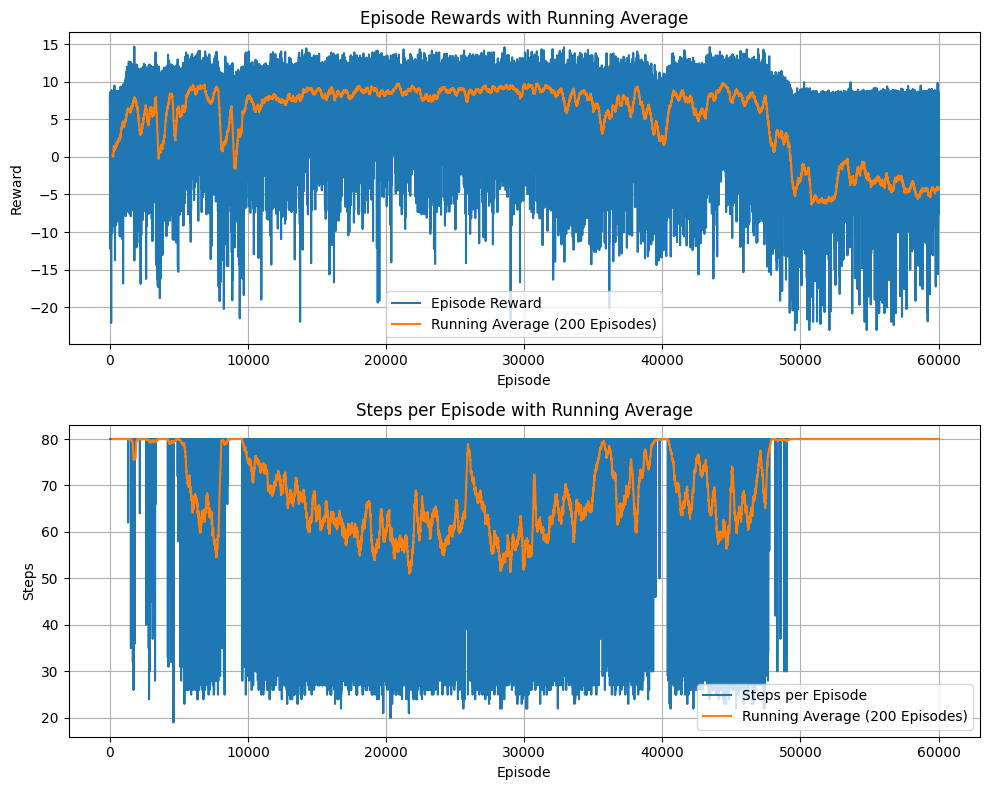

In [ ]:
# train model
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_131709.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_201307.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_17022025_201307.pkl


 50%|█████     | 20000/40000 [00:00<?, ?it/s]

Episode 20000: Average Reward = 3.462568749999996, Average Steps = 79.545, Average n open doors = 1.181


 50%|█████     | 20001/40000 [00:04<22:23:55,  4.03s/it]

Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_140749.h5 and dualdqn_model_18022025_140749.pkl


 53%|█████▎    | 21001/40000 [10:16<3:20:26,  1.58it/s]

Episode 21000: Average Reward = 1.7607599999999974, Average Steps = 79.968, Average n open doors = 0.783


 55%|█████▌    | 22001/40000 [20:29<2:54:10,  1.72it/s]

Episode 22000: Average Reward = 1.3677499999999974, Average Steps = 80.0, Average n open doors = 0.679


 58%|█████▊    | 23001/40000 [30:41<2:42:10,  1.75it/s]

Episode 23000: Average Reward = -0.9881712499999998, Average Steps = 79.953, Average n open doors = 0.514


 60%|██████    | 24001/40000 [40:51<2:32:48,  1.74it/s]

Episode 24000: Average Reward = 1.4457999999999975, Average Steps = 80.0, Average n open doors = 0.691


 63%|██████▎   | 25001/40000 [51:02<2:30:56,  1.66it/s]

Episode 25000: Average Reward = 1.9540499999999965, Average Steps = 80.0, Average n open doors = 0.811
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_145848.h5 and dualdqn_model_18022025_145848.pkl


 65%|██████▌   | 26001/40000 [1:01:10<2:16:33,  1.71it/s]

Episode 26000: Average Reward = 4.757126249999994, Average Steps = 79.851, Average n open doors = 1.28


 68%|██████▊   | 27001/40000 [1:11:04<2:01:09,  1.79it/s]

Episode 27000: Average Reward = 6.262476249999993, Average Steps = 78.251, Average n open doors = 2.12


 70%|███████   | 28001/40000 [1:20:27<1:44:55,  1.91it/s]

Episode 28000: Average Reward = 7.340436249999995, Average Steps = 74.259, Average n open doors = 2.72


 73%|███████▎  | 29001/40000 [1:29:29<1:42:01,  1.80it/s]

Episode 29000: Average Reward = 8.230431249999995, Average Steps = 71.255, Average n open doors = 3.045


 75%|███████▌  | 30001/40000 [1:36:47<58:57,  2.83it/s]

Episode 30000: Average Reward = 9.645962499999998, Average Steps = 57.27, Average n open doors = 4.195
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_154433.h5 and dualdqn_model_18022025_154433.pkl


 78%|███████▊  | 31001/40000 [1:43:28<43:16,  3.47it/s]

Episode 31000: Average Reward = 9.949846249999998, Average Steps = 52.307, Average n open doors = 4.379


 80%|████████  | 32001/40000 [1:49:49<44:01,  3.03it/s]

Episode 32000: Average Reward = 9.96987125, Average Steps = 49.767, Average n open doors = 4.453


 83%|████████▎ | 33001/40000 [1:56:01<39:44,  2.94it/s]

Episode 33000: Average Reward = 9.59925125, Average Steps = 48.671, Average n open doors = 4.482


 85%|████████▌ | 34001/40000 [2:01:40<34:01,  2.94it/s]

Episode 34000: Average Reward = 10.321643750000002, Average Steps = 44.445, Average n open doors = 4.752


 88%|████████▊ | 35001/40000 [2:08:09<30:43,  2.71it/s]

Episode 35000: Average Reward = 9.41765625, Average Steps = 50.315, Average n open doors = 4.298
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_161554.h5 and dualdqn_model_18022025_161554.pkl


 90%|█████████ | 36001/40000 [2:14:20<30:43,  2.17it/s]

Episode 36000: Average Reward = 10.14270625, Average Steps = 48.315, Average n open doors = 4.608


 93%|█████████▎| 37001/40000 [2:19:57<21:27,  2.33it/s]

Episode 37000: Average Reward = 10.17157375, Average Steps = 44.109, Average n open doors = 4.725


 95%|█████████▌| 38001/40000 [2:25:34<10:59,  3.03it/s]

Episode 38000: Average Reward = 10.436756250000002, Average Steps = 43.315, Average n open doors = 4.777


 98%|█████████▊| 39001/40000 [2:31:00<07:06,  2.34it/s]

Episode 39000: Average Reward = 10.3022075, Average Steps = 42.666, Average n open doors = 4.778


100%|██████████| 40000/40000 [2:36:27<00:00,  2.13it/s]


Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_164413.h5 and dualdqn_model_18022025_164413.pkl


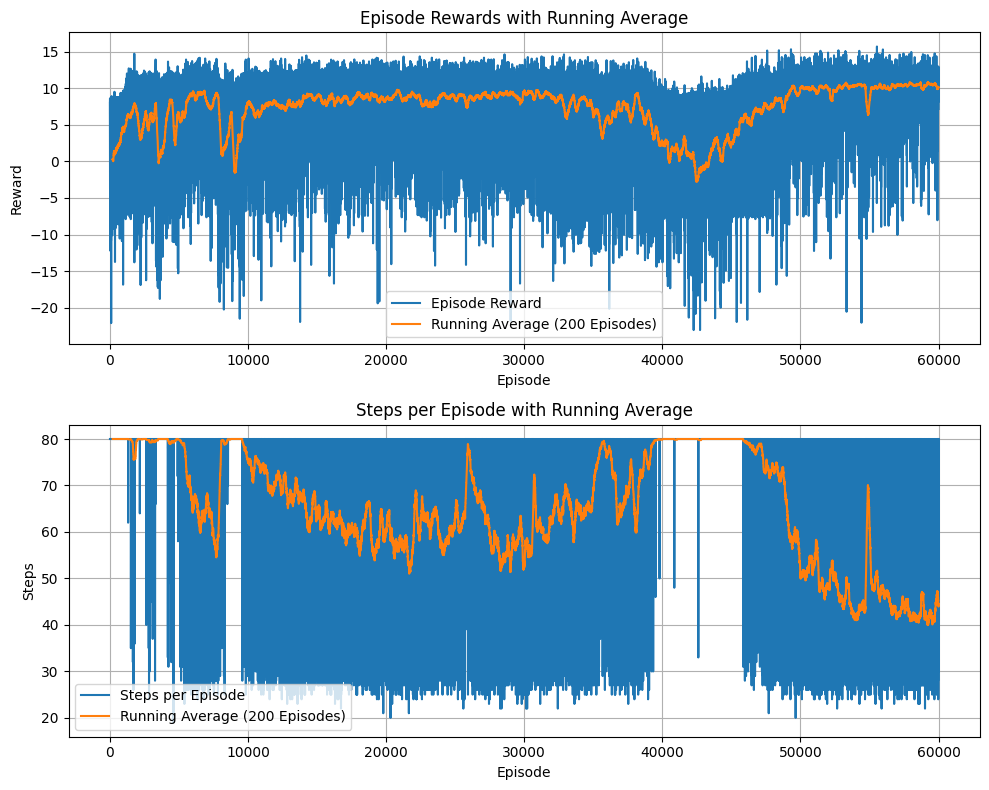

In [ ]:
# train model - done =+3, strat from 20,000
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_201307.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_164413.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_164413.pkl


 67%|██████▋   | 40000/60000 [00:00<?, ?it/s]

Episode 40000: Average Reward = 10.440963749999998, Average Steps = 42.741, Average n open doors = 4.793


 67%|██████▋   | 40001/60000 [00:00<1:05:20,  5.10it/s]

Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_195127.h5 and dualdqn_model_18022025_195127.pkl


 68%|██████▊   | 41001/60000 [05:05<1:24:49,  3.73it/s]

Episode 41000: Average Reward = 10.15058375, Average Steps = 43.037, Average n open doors = 4.759


 70%|███████   | 42001/60000 [10:24<1:34:23,  3.18it/s]

Episode 42000: Average Reward = 9.840987499999999, Average Steps = 44.89, Average n open doors = 4.713


 72%|███████▏  | 43001/60000 [15:38<1:50:01,  2.58it/s]

Episode 43000: Average Reward = 9.94224875, Average Steps = 44.289, Average n open doors = 4.731


 73%|███████▎  | 44001/60000 [21:00<1:42:30,  2.60it/s]

Episode 44000: Average Reward = 9.58291, Average Steps = 46.368, Average n open doors = 4.612


 75%|███████▌  | 45001/60000 [27:16<2:07:42,  1.96it/s]

Episode 45000: Average Reward = 8.216231249999998, Average Steps = 54.375, Average n open doors = 3.992
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_201843.h5 and dualdqn_model_18022025_201843.pkl


 77%|███████▋  | 46001/60000 [32:44<1:09:06,  3.38it/s]

Episode 46000: Average Reward = 9.71347125, Average Steps = 47.327, Average n open doors = 4.542


 78%|███████▊  | 47001/60000 [38:15<1:13:25,  2.95it/s]

Episode 47000: Average Reward = 9.609802499999999, Average Steps = 47.742, Average n open doors = 4.527


 80%|████████  | 48001/60000 [43:41<1:17:44,  2.57it/s]

Episode 48000: Average Reward = 9.31872375, Average Steps = 46.949, Average n open doors = 4.562


 82%|████████▏ | 49001/60000 [48:36<1:11:15,  2.57it/s]

Episode 49000: Average Reward = 9.99729875, Average Steps = 42.129, Average n open doors = 4.801


 83%|████████▎ | 50001/60000 [53:31<59:31,  2.80it/s]

Episode 50000: Average Reward = 9.948585, Average Steps = 42.548, Average n open doors = 4.737
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_204458.h5 and dualdqn_model_18022025_204458.pkl


 85%|████████▌ | 51001/60000 [1:02:07<1:20:12,  1.87it/s]

Episode 51000: Average Reward = -3.2870962499999954, Average Steps = 75.093, Average n open doors = 0.908


 87%|████████▋ | 52001/60000 [1:11:19<1:09:50,  1.91it/s]

Episode 52000: Average Reward = -6.479949999999993, Average Steps = 80.0, Average n open doors = 0.057


 88%|████████▊ | 53001/60000 [1:20:26<1:00:31,  1.93it/s]

Episode 53000: Average Reward = -6.539399999999993, Average Steps = 80.0, Average n open doors = 0.038


 90%|█████████ | 54001/60000 [1:29:32<59:12,  1.69it/s]

Episode 54000: Average Reward = -6.453599999999993, Average Steps = 80.0, Average n open doors = 0.047


 92%|█████████▏| 55001/60000 [1:39:01<50:01,  1.67it/s]

Episode 55000: Average Reward = -6.470499999999992, Average Steps = 80.0, Average n open doors = 0.045
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_213028.h5 and dualdqn_model_18022025_213028.pkl


 93%|█████████▎| 56001/60000 [1:48:29<34:02,  1.96it/s]

Episode 56000: Average Reward = -6.369599999999993, Average Steps = 80.0, Average n open doors = 0.049


 95%|█████████▌| 57001/60000 [1:57:35<27:21,  1.83it/s]

Episode 57000: Average Reward = -6.530449999999994, Average Steps = 80.0, Average n open doors = 0.042


 97%|█████████▋| 58001/60000 [2:06:42<19:37,  1.70it/s]

Episode 58000: Average Reward = -6.504199999999994, Average Steps = 80.0, Average n open doors = 0.04


 98%|█████████▊| 59001/60000 [2:15:44<10:02,  1.66it/s]

Episode 59000: Average Reward = -6.469899999999993, Average Steps = 80.0, Average n open doors = 0.05


100%|██████████| 60000/60000 [2:24:58<00:00,  2.30it/s]


Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_221625.h5 and dualdqn_model_18022025_221625.pkl


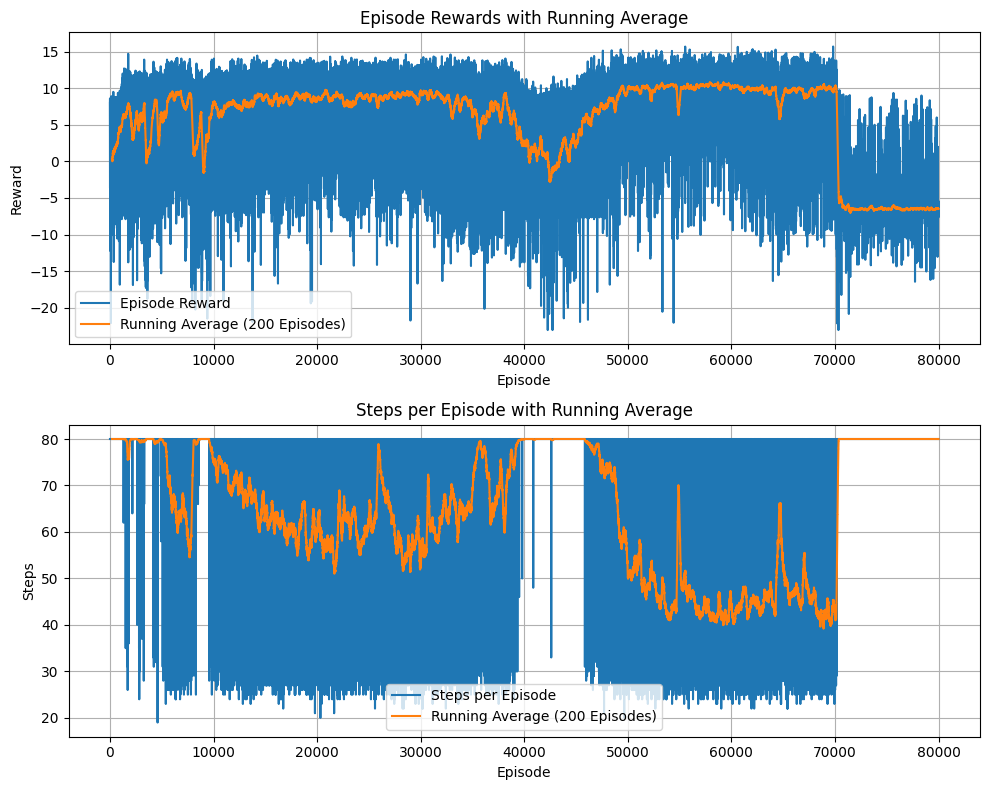

In [ ]:
# train model - done =+3, strat from 40,000
duelingdqn_agent.total_episodes = 60000
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_18022025_164413.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

finnaly decided to continue to the 6 large rooms using the best checkpoint we got so far at episode 70K

## 6 large rooms

In [ ]:
# assign agent
# env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
# env = gymnasium.make("MiniGrid-MultiRoom-N4-S5-v0", render_mode=render_mode, highlight=highlight)
env = gymnasium.make("MiniGrid-MultiRoom-N6-v0", render_mode=render_mode, highlight=highlight)
env.unwrapped.max_steps = 100
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 100000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)


In [ ]:
# train model - strat from 0
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_204458.pkl')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)


Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_204458.pkl


  0%|          | 1/100000 [00:01<31:45:39,  1.14s/it]

Episode 0: Average Reward = -0.10000000000000002, Average Steps = 100.0, Average n open doors = 0.0
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_085603.h5 and dualdqn_model_19022025_085603.pkl


  1%|          | 1001/100000 [10:25<16:22:56,  1.68it/s]

Episode 1000: Average Reward = 0.6178500000000001, Average Steps = 100.0, Average n open doors = 0.251


  2%|▏         | 2001/100000 [20:50<16:21:20,  1.66it/s]

Episode 2000: Average Reward = 0.60345, Average Steps = 100.0, Average n open doors = 0.255


  3%|▎         | 3001/100000 [31:17<16:11:50,  1.66it/s]

Episode 3000: Average Reward = 0.7569000000000001, Average Steps = 100.0, Average n open doors = 0.309


  4%|▍         | 4001/100000 [41:47<17:45:19,  1.50it/s]

Episode 4000: Average Reward = 0.5986000000000001, Average Steps = 100.0, Average n open doors = 0.259


  5%|▌         | 5001/100000 [52:30<16:38:46,  1.59it/s]

Episode 5000: Average Reward = 1.4468, Average Steps = 100.0, Average n open doors = 0.513
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_094832.h5 and dualdqn_model_19022025_094832.pkl


  6%|▌         | 6001/100000 [1:03:12<15:49:29,  1.65it/s]

Episode 6000: Average Reward = 3.023000000000001, Average Steps = 100.0, Average n open doors = 0.867


  7%|▋         | 7001/100000 [1:13:53<15:32:33,  1.66it/s]

Episode 7000: Average Reward = 4.043350000000001, Average Steps = 100.0, Average n open doors = 1.051


  8%|▊         | 8001/100000 [1:24:35<15:23:55,  1.66it/s]

Episode 8000: Average Reward = 4.883600000000002, Average Steps = 100.0, Average n open doors = 1.181


  9%|▉         | 9001/100000 [1:35:14<15:51:54,  1.59it/s]

Episode 9000: Average Reward = 5.418750000000002, Average Steps = 100.0, Average n open doors = 1.232


 10%|█         | 10001/100000 [1:45:54<17:55:41,  1.39it/s]

Episode 10000: Average Reward = 5.773500000000002, Average Steps = 100.0, Average n open doors = 1.3
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_104156.h5 and dualdqn_model_19022025_104156.pkl


 11%|█         | 11001/100000 [1:56:35<15:12:16,  1.63it/s]

Episode 11000: Average Reward = 6.0569000000000015, Average Steps = 100.0, Average n open doors = 1.388


 12%|█▏        | 12001/100000 [2:07:37<15:03:47,  1.62it/s]

Episode 12000: Average Reward = 6.497350000000003, Average Steps = 100.0, Average n open doors = 1.437


 13%|█▎        | 13001/100000 [2:18:34<14:50:22,  1.63it/s]

Episode 13000: Average Reward = 6.906150000000001, Average Steps = 100.0, Average n open doors = 1.468


 14%|█▍        | 14001/100000 [2:29:20<14:43:29,  1.62it/s]

Episode 14000: Average Reward = 6.7867000000000015, Average Steps = 100.0, Average n open doors = 1.46


 15%|█▌        | 15001/100000 [2:40:07<15:08:40,  1.56it/s]

Episode 15000: Average Reward = 7.059250000000002, Average Steps = 100.0, Average n open doors = 1.506
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_113610.h5 and dualdqn_model_19022025_113610.pkl


 16%|█▌        | 16001/100000 [2:50:57<14:24:25,  1.62it/s]

Episode 16000: Average Reward = 7.430063000000001, Average Steps = 99.943, Average n open doors = 1.596


 17%|█▋        | 17001/100000 [3:01:48<16:38:47,  1.38it/s]

Episode 17000: Average Reward = 7.44875, Average Steps = 100.0, Average n open doors = 1.595


 18%|█▊        | 18001/100000 [3:12:39<14:54:00,  1.53it/s]

Episode 18000: Average Reward = 7.801977000000001, Average Steps = 99.947, Average n open doors = 1.644


 19%|█▉        | 19001/100000 [3:23:32<14:04:25,  1.60it/s]

Episode 19000: Average Reward = 8.382397, Average Steps = 99.917, Average n open doors = 1.81


 20%|██        | 20001/100000 [3:34:27<16:16:29,  1.37it/s]

Episode 20000: Average Reward = 8.29232, Average Steps = 99.97, Average n open doors = 1.811
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_123030.h5 and dualdqn_model_19022025_123030.pkl


 21%|██        | 21001/100000 [3:45:24<13:43:44,  1.60it/s]

Episode 21000: Average Reward = 8.176853999999999, Average Steps = 99.944, Average n open doors = 1.771


 22%|██▏       | 22001/100000 [3:56:21<14:00:14,  1.55it/s]

Episode 22000: Average Reward = 9.208269999999997, Average Steps = 99.82, Average n open doors = 2.123


 23%|██▎       | 23001/100000 [4:07:20<13:33:49,  1.58it/s]

Episode 23000: Average Reward = 8.709101999999998, Average Steps = 99.922, Average n open doors = 1.906


 24%|██▍       | 24001/100000 [4:18:37<13:24:41,  1.57it/s]

Episode 24000: Average Reward = 9.268587999999998, Average Steps = 99.868, Average n open doors = 2.063


 25%|██▌       | 25001/100000 [4:29:42<16:00:01,  1.30it/s]

Episode 25000: Average Reward = 9.706509999999998, Average Steps = 99.56, Average n open doors = 2.297
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_132544.h5 and dualdqn_model_19022025_132544.pkl


 26%|██▌       | 26001/100000 [4:40:42<13:05:59,  1.57it/s]

Episode 26000: Average Reward = 9.629353999999998, Average Steps = 99.494, Average n open doors = 2.282


 27%|██▋       | 27001/100000 [4:51:41<12:45:20,  1.59it/s]

Episode 27000: Average Reward = 9.582097999999998, Average Steps = 99.578, Average n open doors = 2.285


 28%|██▊       | 28001/100000 [5:02:52<12:55:45,  1.55it/s]

Episode 28000: Average Reward = 9.981064999999996, Average Steps = 99.565, Average n open doors = 2.503


 29%|██▉       | 29001/100000 [5:14:10<13:30:18,  1.46it/s]

Episode 29000: Average Reward = 10.229714999999997, Average Steps = 99.515, Average n open doors = 2.595


 30%|███       | 30001/100000 [5:25:22<12:44:48,  1.53it/s]

Episode 30000: Average Reward = 10.341629999999997, Average Steps = 98.78, Average n open doors = 2.687
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_142125.h5 and dualdqn_model_19022025_142125.pkl


 31%|███       | 31001/100000 [5:36:35<12:30:14,  1.53it/s]

Episode 31000: Average Reward = 10.265791999999996, Average Steps = 98.912, Average n open doors = 2.659


 32%|███▏      | 32001/100000 [5:47:40<12:06:46,  1.56it/s]

Episode 32000: Average Reward = 10.479948999999998, Average Steps = 98.039, Average n open doors = 2.845


 33%|███▎      | 33001/100000 [5:58:48<13:03:36,  1.43it/s]

Episode 33000: Average Reward = 10.176158999999997, Average Steps = 98.049, Average n open doors = 2.819


 34%|███▍      | 34001/100000 [6:10:03<12:46:45,  1.43it/s]

Episode 34000: Average Reward = 9.348082999999995, Average Steps = 98.863, Average n open doors = 2.527


 35%|███▌      | 35001/100000 [6:21:03<12:16:49,  1.47it/s]

Episode 35000: Average Reward = 10.775371999999996, Average Steps = 97.892, Average n open doors = 2.901
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_151705.h5 and dualdqn_model_19022025_151705.pkl


 36%|███▌      | 36001/100000 [6:31:50<10:49:07,  1.64it/s]

Episode 36000: Average Reward = 11.259481999999997, Average Steps = 96.452, Average n open doors = 3.171


 37%|███▋      | 37001/100000 [6:42:46<12:58:24,  1.35it/s]

Episode 37000: Average Reward = 5.307878999999999, Average Steps = 98.319, Average n open doors = 1.927


 38%|███▊      | 38001/100000 [6:53:51<12:21:03,  1.39it/s]

Episode 38000: Average Reward = -4.888749999999996, Average Steps = 100.0, Average n open doors = 0.138


 39%|███▉      | 39001/100000 [7:04:55<11:04:35,  1.53it/s]

Episode 39000: Average Reward = -5.273549999999996, Average Steps = 100.0, Average n open doors = 0.127


 40%|████      | 40001/100000 [7:16:00<11:10:28,  1.49it/s]

Episode 40000: Average Reward = -5.6528999999999945, Average Steps = 100.0, Average n open doors = 0.111
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_161202.h5 and dualdqn_model_19022025_161202.pkl


 41%|████      | 41001/100000 [7:27:07<11:54:31,  1.38it/s]

Episode 41000: Average Reward = -5.139699999999995, Average Steps = 100.0, Average n open doors = 0.104


 42%|████▏     | 42001/100000 [7:38:16<11:39:34,  1.38it/s]

Episode 42000: Average Reward = -4.660349999999996, Average Steps = 100.0, Average n open doors = 0.076


 42%|████▏     | 42024/100000 [7:38:31<10:37:22,  1.52it/s]

In [ ]:
# train model - strat from 0
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_151705.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_151705.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_19022025_151705.pkl


 35%|███▌      | 35001/100000 [00:01<33:56:16,  1.88s/it]

Episode 35000: Average Reward = 10.772121999999996, Average Steps = 97.892, Average n open doors = 2.898
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_175010.h5 and dualdqn_model_19022025_175010.pkl


 36%|███▌      | 36001/100000 [11:36<11:47:13,  1.51it/s]

Episode 36000: Average Reward = 3.090673999999998, Average Steps = 99.914, Average n open doors = 0.934


 37%|███▋      | 37001/100000 [23:06<13:07:43,  1.33it/s]

Episode 37000: Average Reward = 6.778588999999996, Average Steps = 99.979, Average n open doors = 1.251


 38%|███▊      | 38001/100000 [34:40<11:11:45,  1.54it/s]

Episode 38000: Average Reward = 10.023109999999996, Average Steps = 99.91, Average n open doors = 2.52


 39%|███▉      | 39001/100000 [46:18<11:01:35,  1.54it/s]

Episode 39000: Average Reward = 10.367793999999996, Average Steps = 99.834, Average n open doors = 2.708


 40%|████      | 40001/100000 [57:41<11:23:57,  1.46it/s]

Episode 40000: Average Reward = 11.634831999999994, Average Steps = 98.452, Average n open doors = 3.445
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_184749.h5 and dualdqn_model_19022025_184749.pkl


 41%|████      | 41001/100000 [1:08:58<11:23:02,  1.44it/s]

Episode 41000: Average Reward = 11.416953999999993, Average Steps = 97.144, Average n open doors = 3.495


 42%|████▏     | 42001/100000 [1:20:05<9:59:38,  1.61it/s]

Episode 42000: Average Reward = 11.321594999999995, Average Steps = 96.295, Average n open doors = 3.638


 43%|████▎     | 43001/100000 [1:31:00<10:19:34,  1.53it/s]

Episode 43000: Average Reward = 11.893784999999996, Average Steps = 95.835, Average n open doors = 3.739


 44%|████▍     | 44001/100000 [1:41:57<10:22:42,  1.50it/s]

Episode 44000: Average Reward = 11.584526999999998, Average Steps = 95.997, Average n open doors = 3.704


 45%|████▌     | 45001/100000 [1:52:56<11:20:16,  1.35it/s]

Episode 45000: Average Reward = 11.493008999999997, Average Steps = 94.999, Average n open doors = 3.707
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_194304.h5 and dualdqn_model_19022025_194304.pkl


 46%|████▌     | 46001/100000 [2:03:45<9:37:23,  1.56it/s]

Episode 46000: Average Reward = 11.462184999999998, Average Steps = 93.185, Average n open doors = 3.73


 47%|████▋     | 47001/100000 [2:13:52<8:35:24,  1.71it/s]

Episode 47000: Average Reward = 12.263124999999997, Average Steps = 88.575, Average n open doors = 4.042


 48%|████▊     | 48001/100000 [2:24:18<9:46:32,  1.48it/s]

Episode 48000: Average Reward = 11.642202999999999, Average Steps = 89.783, Average n open doors = 3.853


 49%|████▉     | 49001/100000 [2:34:44<7:32:25,  1.88it/s]

Episode 49000: Average Reward = 11.484033, Average Steps = 90.113, Average n open doors = 3.679


 50%|█████     | 50001/100000 [2:44:30<11:10:16,  1.24it/s]

Episode 50000: Average Reward = 12.260509999999998, Average Steps = 84.61, Average n open doors = 4.061
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_203439.h5 and dualdqn_model_19022025_203439.pkl


 51%|█████     | 51001/100000 [2:54:31<6:12:00,  2.20it/s]

Episode 51000: Average Reward = 11.950988999999998, Average Steps = 85.779, Average n open doors = 4.008


 52%|█████▏    | 52001/100000 [3:04:01<7:05:25,  1.88it/s]

Episode 52000: Average Reward = 12.089079999999997, Average Steps = 81.38, Average n open doors = 4.084


 53%|█████▎    | 53001/100000 [3:13:45<8:21:44,  1.56it/s]

Episode 53000: Average Reward = 11.609739999999999, Average Steps = 83.14, Average n open doors = 3.958


 54%|█████▍    | 54001/100000 [3:23:21<7:58:26,  1.60it/s]

Episode 54000: Average Reward = 11.926161999999998, Average Steps = 82.182, Average n open doors = 4.102


 55%|█████▌    | 55001/100000 [3:32:55<8:07:10,  1.54it/s]

Episode 55000: Average Reward = 11.810820999999999, Average Steps = 82.281, Average n open doors = 4.062
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_212304.h5 and dualdqn_model_19022025_212304.pkl


 56%|█████▌    | 56001/100000 [3:42:11<8:29:17,  1.44it/s]

Episode 56000: Average Reward = 12.190151, Average Steps = 79.111, Average n open doors = 4.215


 57%|█████▋    | 57001/100000 [3:51:24<6:07:45,  1.95it/s]

Episode 57000: Average Reward = 12.019881999999999, Average Steps = 79.952, Average n open doors = 4.245


 58%|█████▊    | 58001/100000 [4:00:25<6:18:41,  1.85it/s]

Episode 58000: Average Reward = 12.088137999999999, Average Steps = 78.468, Average n open doors = 4.267


 59%|█████▊    | 58573/100000 [4:05:30<5:07:35,  2.24it/s]

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_212304.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_19022025_212304.pkl


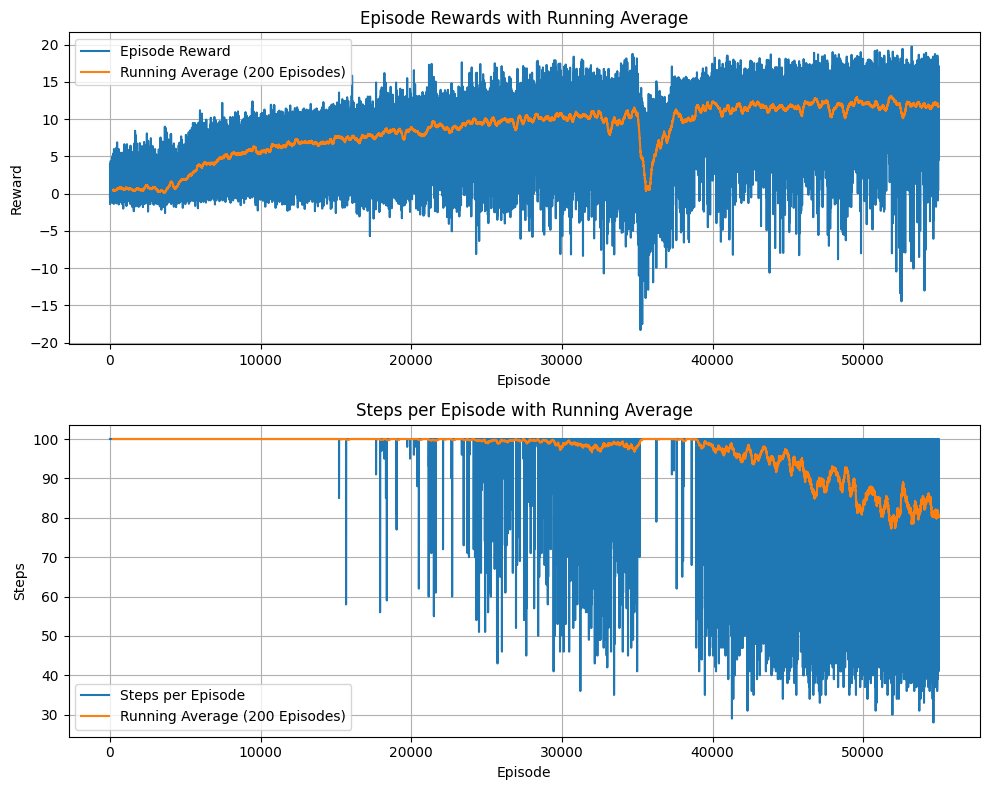

In [ ]:
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_212304.h5')
plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

In [ ]:
# train model - continue from 55000
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_212304.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_19022025_212304.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_19022025_212304.pkl


 55%|█████▌    | 55001/100000 [00:01<20:48:53,  1.67s/it]

Episode 55000: Average Reward = 11.804652999999998, Average Steps = 82.283, Average n open doors = 4.062
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_070617.h5 and dualdqn_model_20022025_070617.pkl


 56%|█████▌    | 56001/100000 [09:14<6:22:24,  1.92it/s]

Episode 56000: Average Reward = 12.200353999999997, Average Steps = 80.894, Average n open doors = 4.104


 57%|█████▋    | 57001/100000 [18:15<6:16:48,  1.90it/s]

Episode 57000: Average Reward = 12.375041000000001, Average Steps = 79.201, Average n open doors = 4.196


 58%|█████▊    | 58001/100000 [27:19<5:09:10,  2.26it/s]

Episode 58000: Average Reward = 12.160167, Average Steps = 79.837, Average n open doors = 4.184


 59%|█████▉    | 59001/100000 [36:12<5:30:11,  2.07it/s]

Episode 59000: Average Reward = 12.428363999999998, Average Steps = 78.154, Average n open doors = 4.284


 60%|██████    | 60001/100000 [45:16<5:19:42,  2.09it/s]

Episode 60000: Average Reward = 12.004207999999998, Average Steps = 79.638, Average n open doors = 4.203
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_075131.h5 and dualdqn_model_20022025_075131.pkl


 61%|██████    | 61001/100000 [54:17<5:26:15,  1.99it/s]

Episode 61000: Average Reward = 12.132852999999999, Average Steps = 79.383, Average n open doors = 4.187


 62%|██████▏   | 62001/100000 [1:02:57<4:51:21,  2.17it/s]

Episode 62000: Average Reward = 12.21182, Average Steps = 76.12, Average n open doors = 4.301


 63%|██████▎   | 63001/100000 [1:11:41<5:40:41,  1.81it/s]

Episode 63000: Average Reward = 12.318083999999999, Average Steps = 76.974, Average n open doors = 4.199


 64%|██████▍   | 64001/100000 [1:20:13<5:25:52,  1.84it/s]

Episode 64000: Average Reward = 12.04326, Average Steps = 75.31, Average n open doors = 4.268


 65%|██████▌   | 65001/100000 [1:28:12<5:57:55,  1.63it/s]

Episode 65000: Average Reward = 12.391438, Average Steps = 70.418, Average n open doors = 4.463
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_083428.h5 and dualdqn_model_20022025_083428.pkl


 66%|██████▌   | 66001/100000 [1:36:41<5:41:01,  1.66it/s]

Episode 66000: Average Reward = 12.263202, Average Steps = 73.172, Average n open doors = 4.306


 67%|██████▋   | 67001/100000 [1:45:20<6:02:55,  1.52it/s]

Episode 67000: Average Reward = 11.697723, Average Steps = 74.753, Average n open doors = 4.129


 68%|██████▊   | 68001/100000 [1:54:28<4:53:59,  1.81it/s]

Episode 68000: Average Reward = 10.901871, Average Steps = 80.631, Average n open doors = 3.912


 69%|██████▉   | 69001/100000 [2:02:32<4:17:14,  2.01it/s]

Episode 69000: Average Reward = 12.268386999999999, Average Steps = 71.157, Average n open doors = 4.379


 70%|███████   | 70001/100000 [2:10:23<4:29:13,  1.86it/s]

Episode 70000: Average Reward = 12.204959, Average Steps = 69.249, Average n open doors = 4.405
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_091638.h5 and dualdqn_model_20022025_091638.pkl


 71%|███████   | 71001/100000 [2:18:08<4:15:16,  1.89it/s]

Episode 71000: Average Reward = 12.757321000000001, Average Steps = 68.331, Average n open doors = 4.546


 72%|███████▏  | 72001/100000 [2:25:50<3:08:49,  2.47it/s]

Episode 72000: Average Reward = 12.411356, Average Steps = 68.016, Average n open doors = 4.536


 73%|███████▎  | 73001/100000 [2:33:35<2:47:05,  2.69it/s]

Episode 73000: Average Reward = 12.456850000000003, Average Steps = 68.35, Average n open doors = 4.497


 74%|███████▍  | 74001/100000 [2:41:04<2:47:03,  2.59it/s]

Episode 74000: Average Reward = 12.581716, Average Steps = 65.926, Average n open doors = 4.573


 75%|███████▌  | 75001/100000 [2:48:53<3:22:05,  2.06it/s]

Episode 75000: Average Reward = 12.415905, Average Steps = 69.105, Average n open doors = 4.48
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_095509.h5 and dualdqn_model_20022025_095509.pkl


 76%|███████▌  | 76001/100000 [2:56:34<3:29:25,  1.91it/s]

Episode 76000: Average Reward = 12.692251, Average Steps = 67.661, Average n open doors = 4.52


 77%|███████▋  | 77001/100000 [3:04:33<3:12:59,  1.99it/s]

Episode 77000: Average Reward = 12.140152999999998, Average Steps = 70.183, Average n open doors = 4.413


 78%|███████▊  | 78001/100000 [3:12:03<2:45:39,  2.21it/s]

Episode 78000: Average Reward = 12.705635000000003, Average Steps = 65.835, Average n open doors = 4.584


 79%|███████▉  | 79001/100000 [3:20:09<2:51:17,  2.04it/s]

Episode 79000: Average Reward = 12.268892999999998, Average Steps = 71.273, Average n open doors = 4.407


 80%|████████  | 80001/100000 [3:27:52<2:40:42,  2.07it/s]

Episode 80000: Average Reward = 12.481127, Average Steps = 67.747, Average n open doors = 4.501
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_103407.h5 and dualdqn_model_20022025_103407.pkl


 81%|████████  | 81001/100000 [3:36:01<3:05:01,  1.71it/s]

Episode 81000: Average Reward = 12.302749, Average Steps = 71.639, Average n open doors = 4.385


 82%|████████▏ | 82001/100000 [3:43:51<2:36:58,  1.91it/s]

Episode 82000: Average Reward = 12.324769, Average Steps = 69.059, Average n open doors = 4.476


 83%|████████▎ | 83001/100000 [3:51:37<1:57:54,  2.40it/s]

Episode 83000: Average Reward = 12.349988000000002, Average Steps = 68.368, Average n open doors = 4.542


 84%|████████▍ | 84001/100000 [4:02:47<3:14:41,  1.37it/s]

Episode 84000: Average Reward = -7.354480999999989, Average Steps = 99.409, Average n open doors = 0.171


 84%|████████▍ | 84282/100000 [4:05:57<2:49:47,  1.54it/s]

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_103407.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_103407.pkl


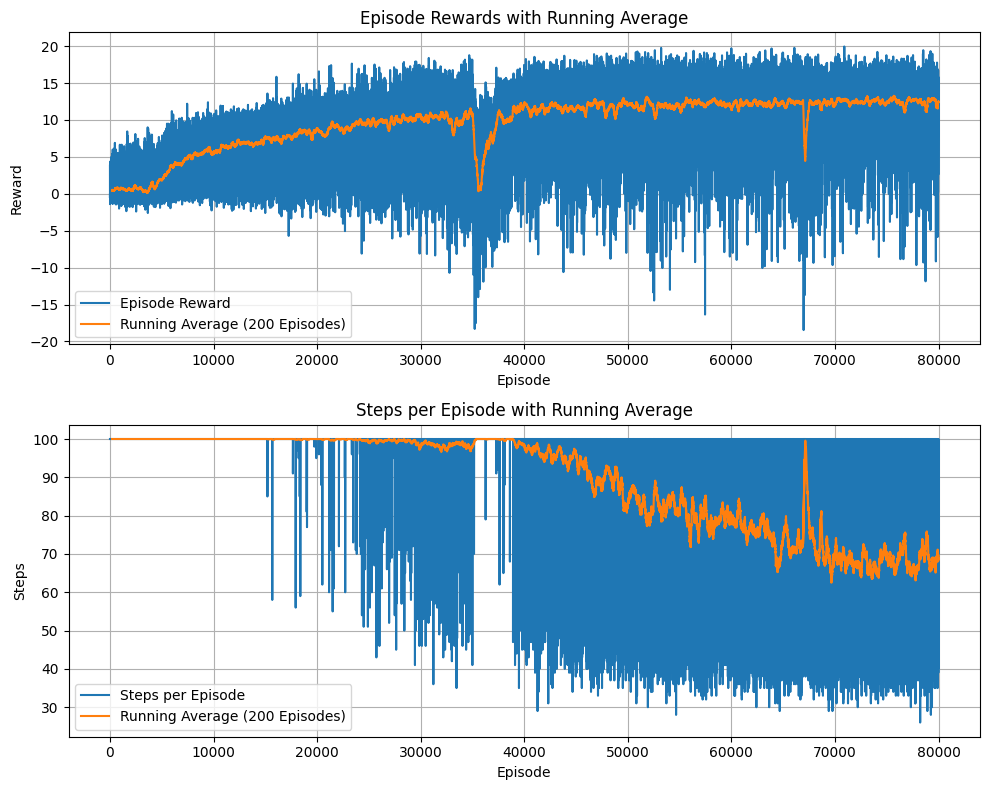

In [ ]:
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_103407.h5')
plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

Checkpoint loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_103407.h5
Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_103407.pkl


 80%|████████  | 80000/100000 [00:00<?, ?it/s]

Episode 80000: Average Reward = 12.479708, Average Steps = 67.738, Average n open doors = 4.501


 80%|████████  | 80001/100000 [00:00<1:49:51,  3.03it/s]

Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_112959.h5 and dualdqn_model_20022025_112959.pkl


 81%|████████  | 81001/100000 [08:02<2:14:01,  2.36it/s]

Episode 81000: Average Reward = 12.544863, Average Steps = 69.443, Average n open doors = 4.407


 82%|████████▏ | 82001/100000 [15:59<2:41:45,  1.85it/s]

Episode 82000: Average Reward = 12.57665, Average Steps = 68.95, Average n open doors = 4.502


 83%|████████▎ | 83001/100000 [23:33<2:09:40,  2.18it/s]

Episode 83000: Average Reward = 12.825108, Average Steps = 65.088, Average n open doors = 4.644


 84%|████████▍ | 84001/100000 [31:34<2:04:12,  2.15it/s]

Episode 84000: Average Reward = 12.352837, Average Steps = 68.407, Average n open doors = 4.496


 85%|████████▌ | 85001/100000 [39:17<2:03:24,  2.03it/s]

Episode 85000: Average Reward = 12.999697, Average Steps = 66.167, Average n open doors = 4.622
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_120916.h5 and dualdqn_model_20022025_120916.pkl


 86%|████████▌ | 86001/100000 [46:49<1:46:40,  2.19it/s]

Episode 86000: Average Reward = 12.977753, Average Steps = 64.483, Average n open doors = 4.672


 87%|████████▋ | 87001/100000 [54:31<1:42:47,  2.11it/s]

Episode 87000: Average Reward = 12.616492000000003, Average Steps = 66.262, Average n open doors = 4.593


 88%|████████▊ | 88001/100000 [1:02:05<1:22:15,  2.43it/s]

Episode 88000: Average Reward = 12.469565000000003, Average Steps = 65.615, Average n open doors = 4.632


 89%|████████▉ | 89001/100000 [1:09:34<1:28:22,  2.07it/s]

Episode 89000: Average Reward = 12.632781000000001, Average Steps = 65.441, Average n open doors = 4.652


 90%|█████████ | 90001/100000 [1:17:12<1:25:46,  1.94it/s]

Episode 90000: Average Reward = 12.548901000000003, Average Steps = 66.711, Average n open doors = 4.6
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_124710.h5 and dualdqn_model_20022025_124710.pkl


 91%|█████████ | 91001/100000 [1:25:03<1:09:12,  2.17it/s]

Episode 91000: Average Reward = 12.353088, Average Steps = 68.968, Average n open doors = 4.43


 92%|█████████▏| 92001/100000 [1:32:14<54:28,  2.45it/s]

Episode 92000: Average Reward = 12.931437000000003, Average Steps = 63.057, Average n open doors = 4.694


 93%|█████████▎| 93001/100000 [1:39:49<49:05,  2.38it/s]

Episode 93000: Average Reward = 12.652384000000001, Average Steps = 66.674, Average n open doors = 4.587


 94%|█████████▍| 94001/100000 [1:47:08<49:32,  2.02it/s]

Episode 94000: Average Reward = 12.928372999999999, Average Steps = 64.003, Average n open doors = 4.677


 95%|█████████▌| 95001/100000 [1:54:43<48:14,  1.73it/s]

Episode 95000: Average Reward = 12.717535, Average Steps = 66.685, Average n open doors = 4.575
Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_132442.h5 and dualdqn_model_20022025_132442.pkl


 96%|█████████▌| 96001/100000 [2:02:16<28:49,  2.31it/s]

Episode 96000: Average Reward = 12.709906, Average Steps = 66.316, Average n open doors = 4.589


 97%|█████████▋| 97001/100000 [2:09:49<18:25,  2.71it/s]

Episode 97000: Average Reward = 12.886309, Average Steps = 65.549, Average n open doors = 4.62


 98%|█████████▊| 98001/100000 [2:17:16<13:59,  2.38it/s]

Episode 98000: Average Reward = 12.489338, Average Steps = 65.318, Average n open doors = 4.602


 99%|█████████▉| 99001/100000 [2:24:40<05:59,  2.78it/s]

Episode 99000: Average Reward = 12.780419000000002, Average Steps = 64.909, Average n open doors = 4.603


100%|██████████| 100000/100000 [2:32:17<00:00,  2.19it/s]


Checkpoint saved: /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_140216.h5 and dualdqn_model_20022025_140216.pkl


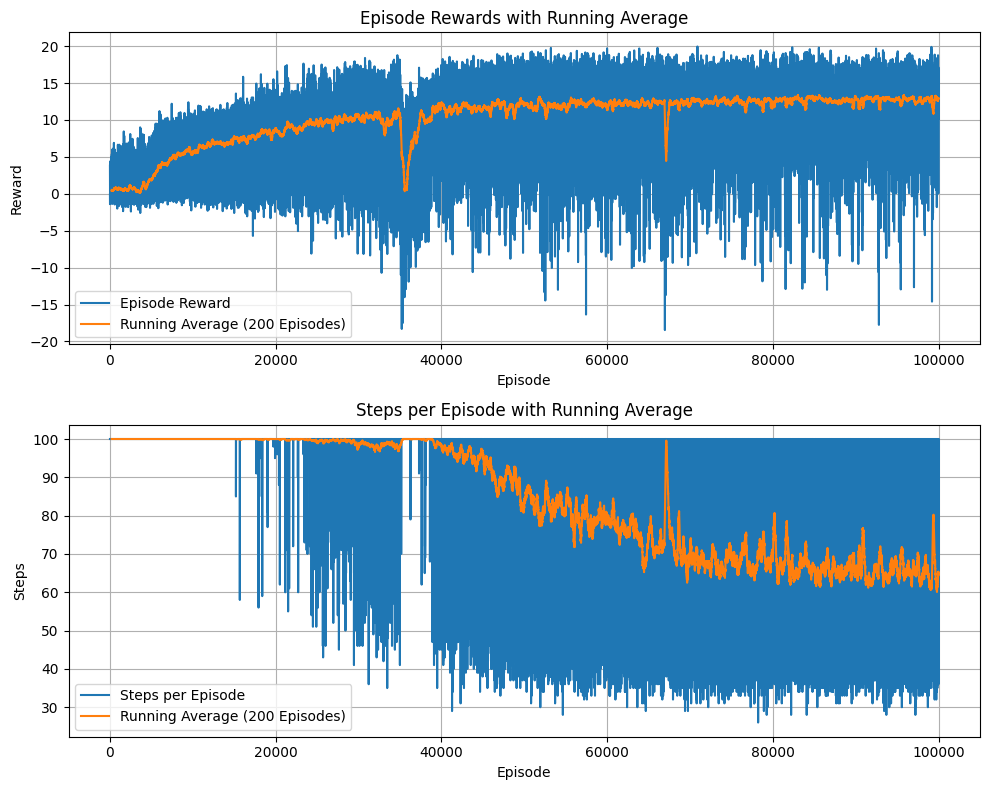

In [ ]:
# train model - continue from 80000
duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_20022025_103407.h5')

duelingdqn_agent.train()
duelingdqn_agent.save_checkpoint(f'/content/drive/MyDrive/Studies/RL_Final_assignment', duelingdqn_agent.total_episodes)

plot_rewards_and_steps(duelingdqn_agent.rewards, duelingdqn_agent.steps)

# Test

## 2 small rooms

In [ ]:
model_path = '/content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_13022025_214937.pkl'
duelingdqn_agent.load_model(model_path)
duelingdqn_agent.test_model(test_num_episodes=10, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_13022025_214937.pkl
Test Episode 1/10, Total Reward: 0.8875, Total Steps: 5
Test Episode 2/10, Total Reward: 0.8875, Total Steps: 5
Test Episode 3/10, Total Reward: 0.82, Total Steps: 8
Test Episode 4/10, Total Reward: 0.865, Total Steps: 6
Test Episode 5/10, Total Reward: 0.73, Total Steps: 12
Test Episode 6/10, Total Reward: 0.7525, Total Steps: 11
Test Episode 7/10, Total Reward: 0.865, Total Steps: 6
Test Episode 8/10, Total Reward: 0.775, Total Steps: 10
Test Episode 9/10, Total Reward: 0.8425, Total Steps: 7
Test Episode 10/10, Total Reward: 0.82, Total Steps: 8


## 6 small rooms

In [ ]:
# unsuccessfull initial tests

# duelingdqn_agent.load_checkpoint('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_checkpoint_17022025_105924.h5')
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_17022025_131709.pkl')

duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_17022025_131709.pkl
Test Episode 1/1, Total Reward: 0, Total Steps: 80


In [ ]:
# Successfull

duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_164413.pkl')

duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_164413.pkl


/usr/local/lib/python3.11/dist-packages/imageio/plugins/ffmpeg.py:727: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(im.tostring())


Test Episode 1/1, Total Reward: 0.595, Total Steps: 36


In [ ]:
duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Test Episode 1/1, Total Reward: 0.58375, Total Steps: 37


In [ ]:

duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_204458.pkl')

duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_18022025_204458.pkl
Test Episode 1/1, Total Reward: 0.595, Total Steps: 36


## 6 large rooms

In [ ]:
# initial test using the small 6 rooms model - not working

duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_19022025_212304.pkl')

duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_19022025_212304.pkl
Test Episode 1/1, Total Reward: 0, Total Steps: 100


In [ ]:
# after extensive large 6 rooms training - success

duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_103407.pkl')

duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_103407.pkl
Test Episode 1/1, Total Reward: 0.5229999999999999, Total Steps: 53


In [ ]:
# success 10/10 !

duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_140216.pkl')

duelingdqn_agent.test_model(test_num_episodes=10, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_140216.pkl
Test Episode 1/10, Total Reward: 0.631, Total Steps: 41
Test Episode 2/10, Total Reward: 0.622, Total Steps: 42
Test Episode 3/10, Total Reward: 0.5409999999999999, Total Steps: 51
Test Episode 4/10, Total Reward: 0.532, Total Steps: 52
Test Episode 5/10, Total Reward: 0.613, Total Steps: 43
Test Episode 6/10, Total Reward: 0.34299999999999997, Total Steps: 73
Test Episode 7/10, Total Reward: 0.45999999999999996, Total Steps: 60
Test Episode 8/10, Total Reward: 0.4959999999999999, Total Steps: 56
Test Episode 9/10, Total Reward: 0.487, Total Steps: 57
Test Episode 10/10, Total Reward: 0.649, Total Steps: 39


# Additional plots


100%|██████████| 100000/100000 [00:00<00:00, 2021838.52it/s]


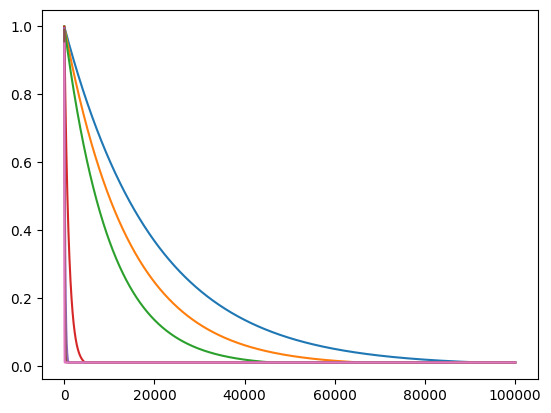

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

total_episodes = 100000
min_epsilon = 0.01
max_epsilon = 1.0


for decay_rate in [0.99995, 0.99993, 0.9999, 0.999, 0.995, 0.99, 0.95]:
  epsilons = []

  epsilon = 1.0
  for episode in tqdm(range(total_episodes)):
      # Reduce epsilon (because we need less and less exploration)
      epsilon = max(min_epsilon, epsilon * decay_rate)
      epsilons.append(epsilon)

  plt.plot(epsilons)
plt.show()

## show first conv kernel filters

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N6-v0", render_mode=render_mode, highlight=highlight)
env.unwrapped.max_steps = 100
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DuelingDQN(4)
gamma = 0.95
learning_rate = 0.0005
decay_rate = 0.99995
total_episodes = 100000

duelingdqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)

In [ ]:
duelingdqn_agent.load_model('/content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_140216_best_6_rooms.pkl')

Model loaded from /content/drive/MyDrive/Studies/RL_Final_assignment/dualdqn_model_20022025_140216_best_6_rooms.pkl


In [ ]:
duelingdqn_agent.test_model(test_num_episodes=1, action_verbose=False)
video_filename = 'test_video.mp4'
embed_mp4(video_filename)

/usr/local/lib/python3.11/dist-packages/imageio/plugins/ffmpeg.py:727: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(im.tostring())


Test Episode 1/1, Total Reward: 0.5049999999999999, Total Steps: 55


In [ ]:
from PIL import Image

def plot_obs(obs, env):
  obs = obs[:,:,1]
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  image = Image.fromarray(obs)
  image.save("partial_obs.png")

  image = Image.fromarray(env.render())
  image.save("full_obs.png")

  axs[1].imshow(obs)
  axs[1].title.set_text(f'RGBImgPartialObsWrapper, shape: {obs.shape}')
  axs[0].imshow(env.render())
  axs[0].title.set_text(f'Full state')
  plt.show()

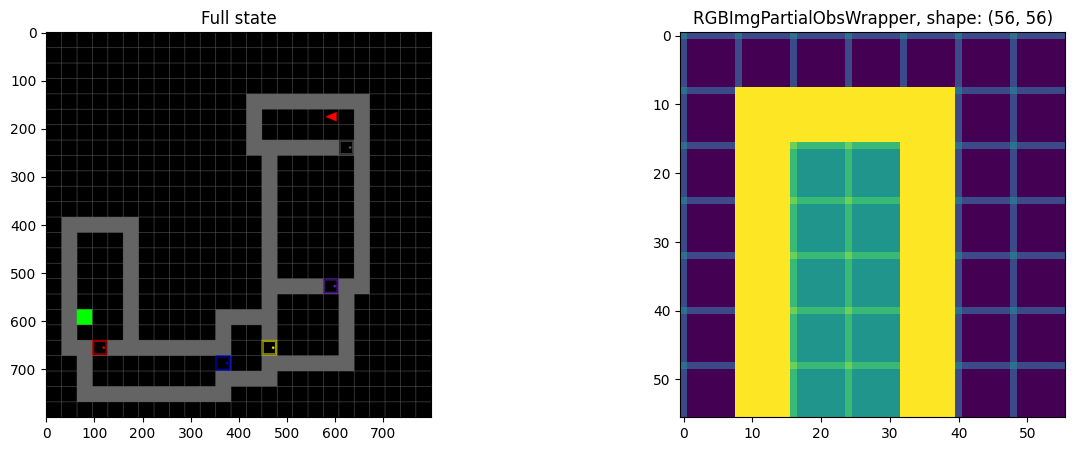

In [ ]:
observation = env.reset()[0]
plot_obs(observation, env)

In [ ]:

obs, reward, done, truncated  , _ = env.step(0)

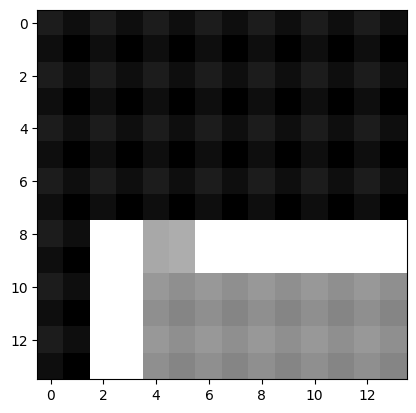

In [ ]:
preproc_obs = duelingdqn_agent.preprocess(obs)
preproc_obs_numpy = preproc_obs.numpy()[0,:,:]
plt.imshow(preproc_obs_numpy, cmap='gray')
# plot_obs(prep_obs.numpy()[0,:,:], env)

In [ ]:
import torch
import matplotlib.pyplot as plt

def visualize_first_layer_features(model, image):
    """
    Given a trained DuelingDQN model and an input image, visualize the 32 feature maps
    after passing through the first convolutional layer.

    Args:
        model (DuelingDQN): Trained model with weights loaded.
        image (torch.Tensor): Input image tensor of shape (1, 1, H, W).

    Returns:
        None (Displays the feature maps)
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Get the first convolutional layer
    first_conv_layer = model.cnn[0]  # nn.Conv2d(1, 32, 3, stride=1)

    # Pass the image through the first convolutional layer
    with torch.no_grad():
        feature_maps = first_conv_layer(image)  # Shape: (1, 32, H', W')

    feature_maps = feature_maps.squeeze(0)  # Remove batch dimension, now (32, H', W')

    # Set the grid layout (4 columns, 8 rows)
    cols = 4
    rows = 8

    # Plot feature maps
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))  # Make each subplot bigger
    axes = axes.flatten()

    for i in range(len(feature_maps)):
        axes[i].imshow(feature_maps[i].cpu().numpy(), cmap="gray")
        # axes[i].axis("off")
        axes[i].set_title(f"Filter {i+1}")

    # Hide any remaining empty subplots (not needed here since 4x8=32)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


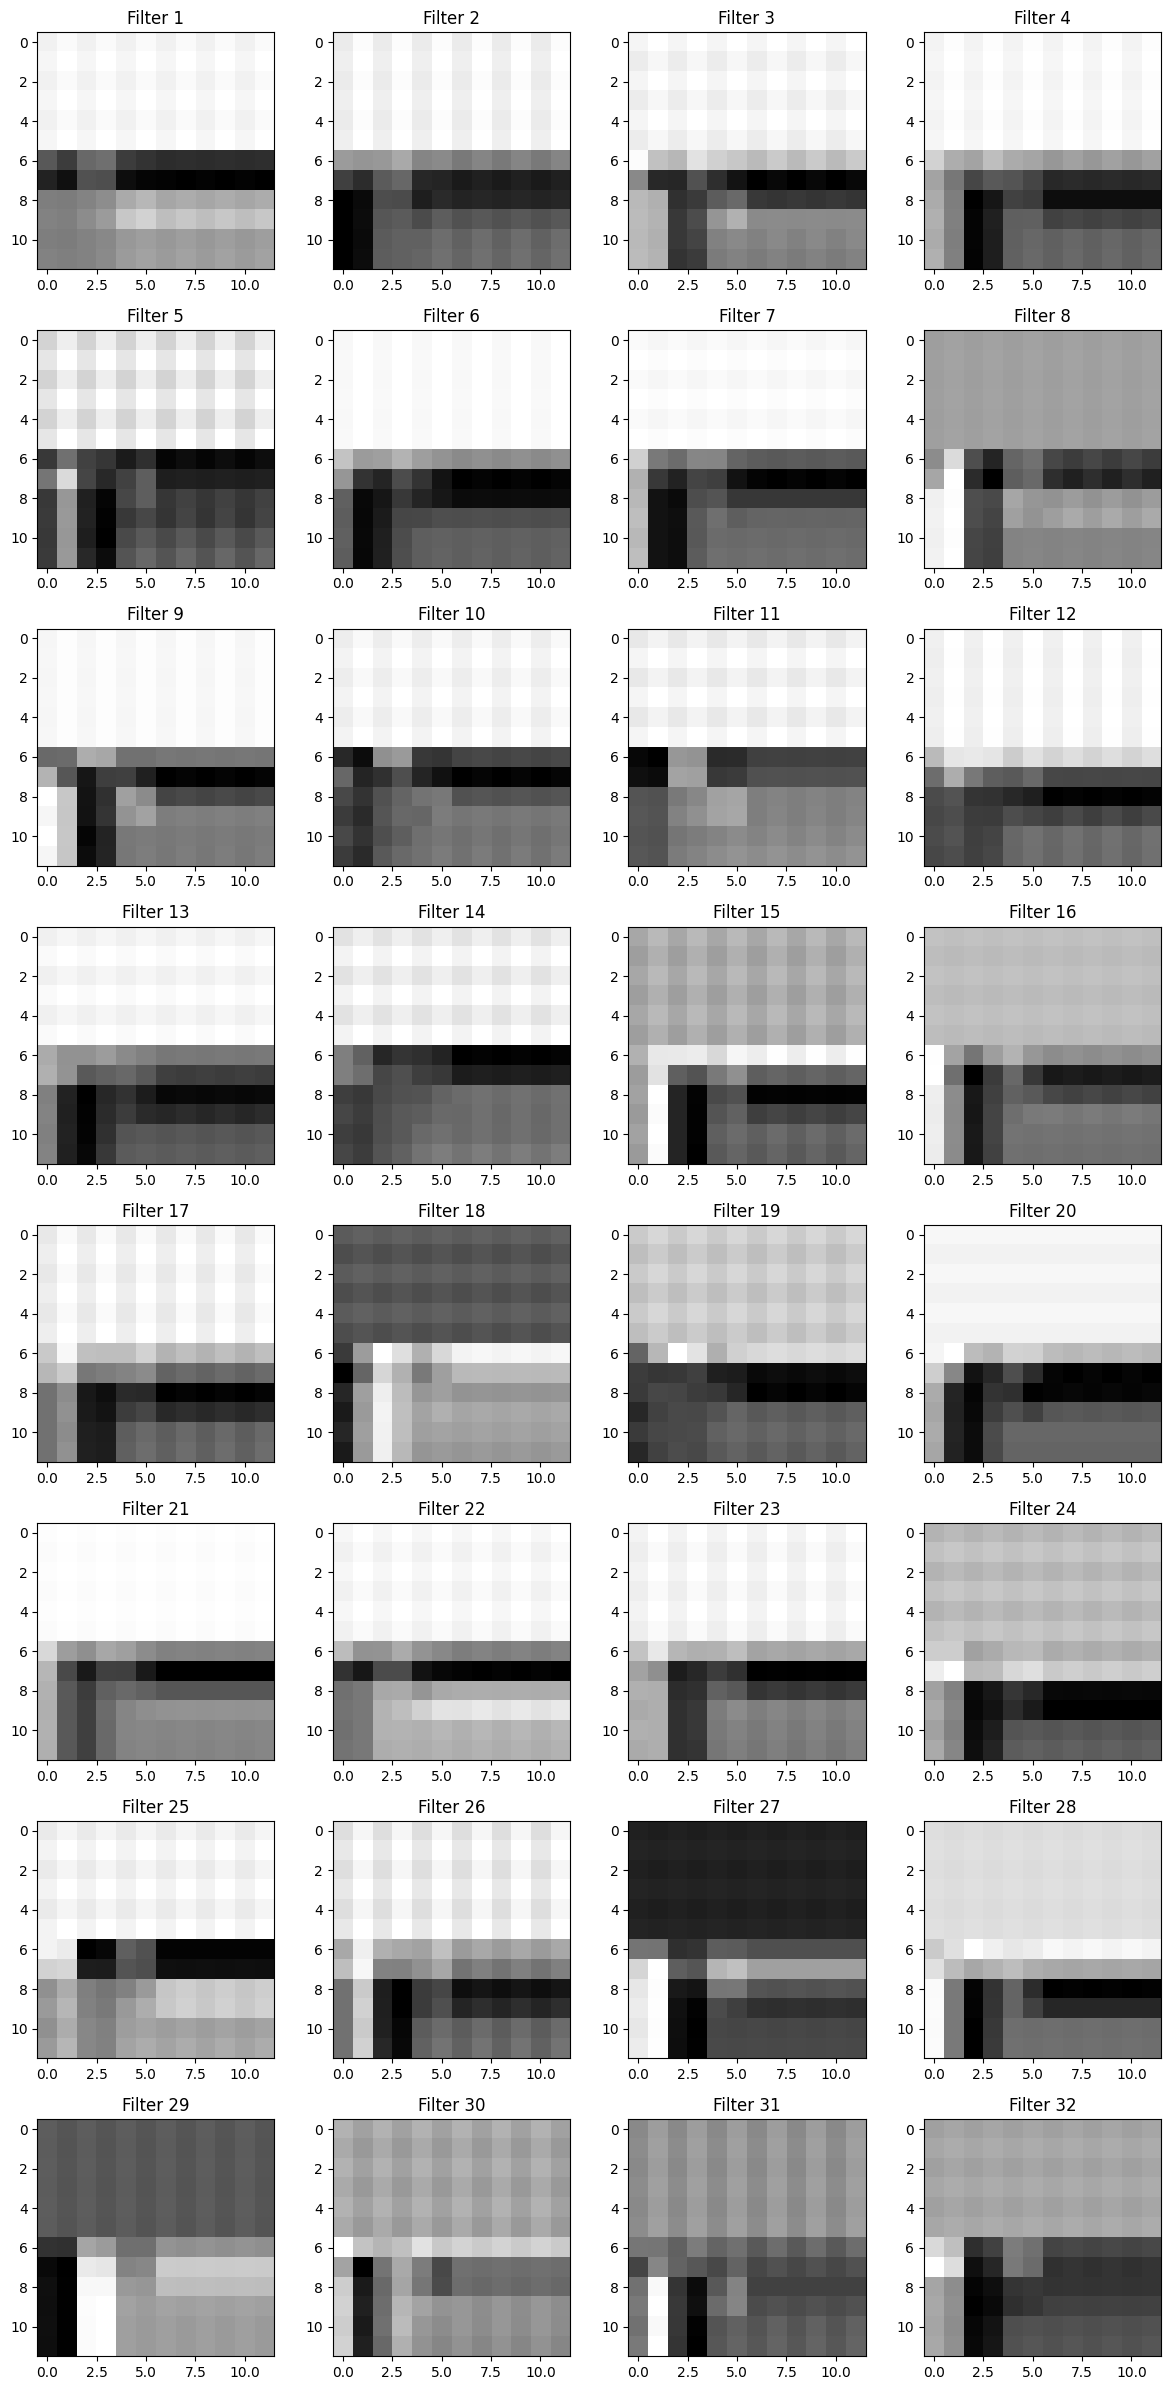

In [ ]:
preproc_obs = duelingdqn_agent.preprocess(obs).to(device).unsqueeze(0)
model = duelingdqn_agent.model
visualize_first_layer_features(model, preproc_obs)

In [ ]:

action = duelingdqn_agent.model(preproc_obs).argmax().item()
preproc_obs, reward, done, truncated  , _ = duelingdqn_agent.env.step(duelingdqn_agent.translate_actions[str(action)])

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

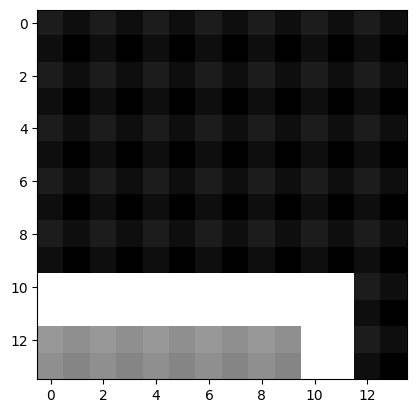

In [ ]:
preproc_obs = duelingdqn_agent.preprocess(preproc_obs)
preproc_obs_numpy = preproc_obs.numpy()[0,:,:]
plt.imshow(preproc_obs_numpy, cmap='gray')


In [ ]:
import torch
import matplotlib.pyplot as plt

def visualize_first_layer_kernels(model):
    """
    Given a trained DuelingDQN model, visualize the 32 kernels (filters)
    from the first convolutional layer.

    Args:
        model (DuelingDQN): Trained model with weights loaded.

    Returns:
        None (Displays the kernels)
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Extract the first convolutional layer weights
    first_conv_layer = model.cnn[0]  # nn.Conv2d(1, 32, 3, stride=1)
    kernels = first_conv_layer.weight.data.cpu().squeeze(1)  # Shape: (32, 3, 3)

    # Set the grid layout (4 columns, 8 rows)
    cols = 4
    rows = 8

    # Plot kernels
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))  # Bigger images
    axes = axes.flatten()

    for i in range(len(kernels)):
        axes[i].imshow(kernels[i].numpy(), cmap="gray")  # Show each kernel
        axes[i].axis("off")
        axes[i].set_title(f"Kernel {i+1}")

    plt.tight_layout()
    plt.show()


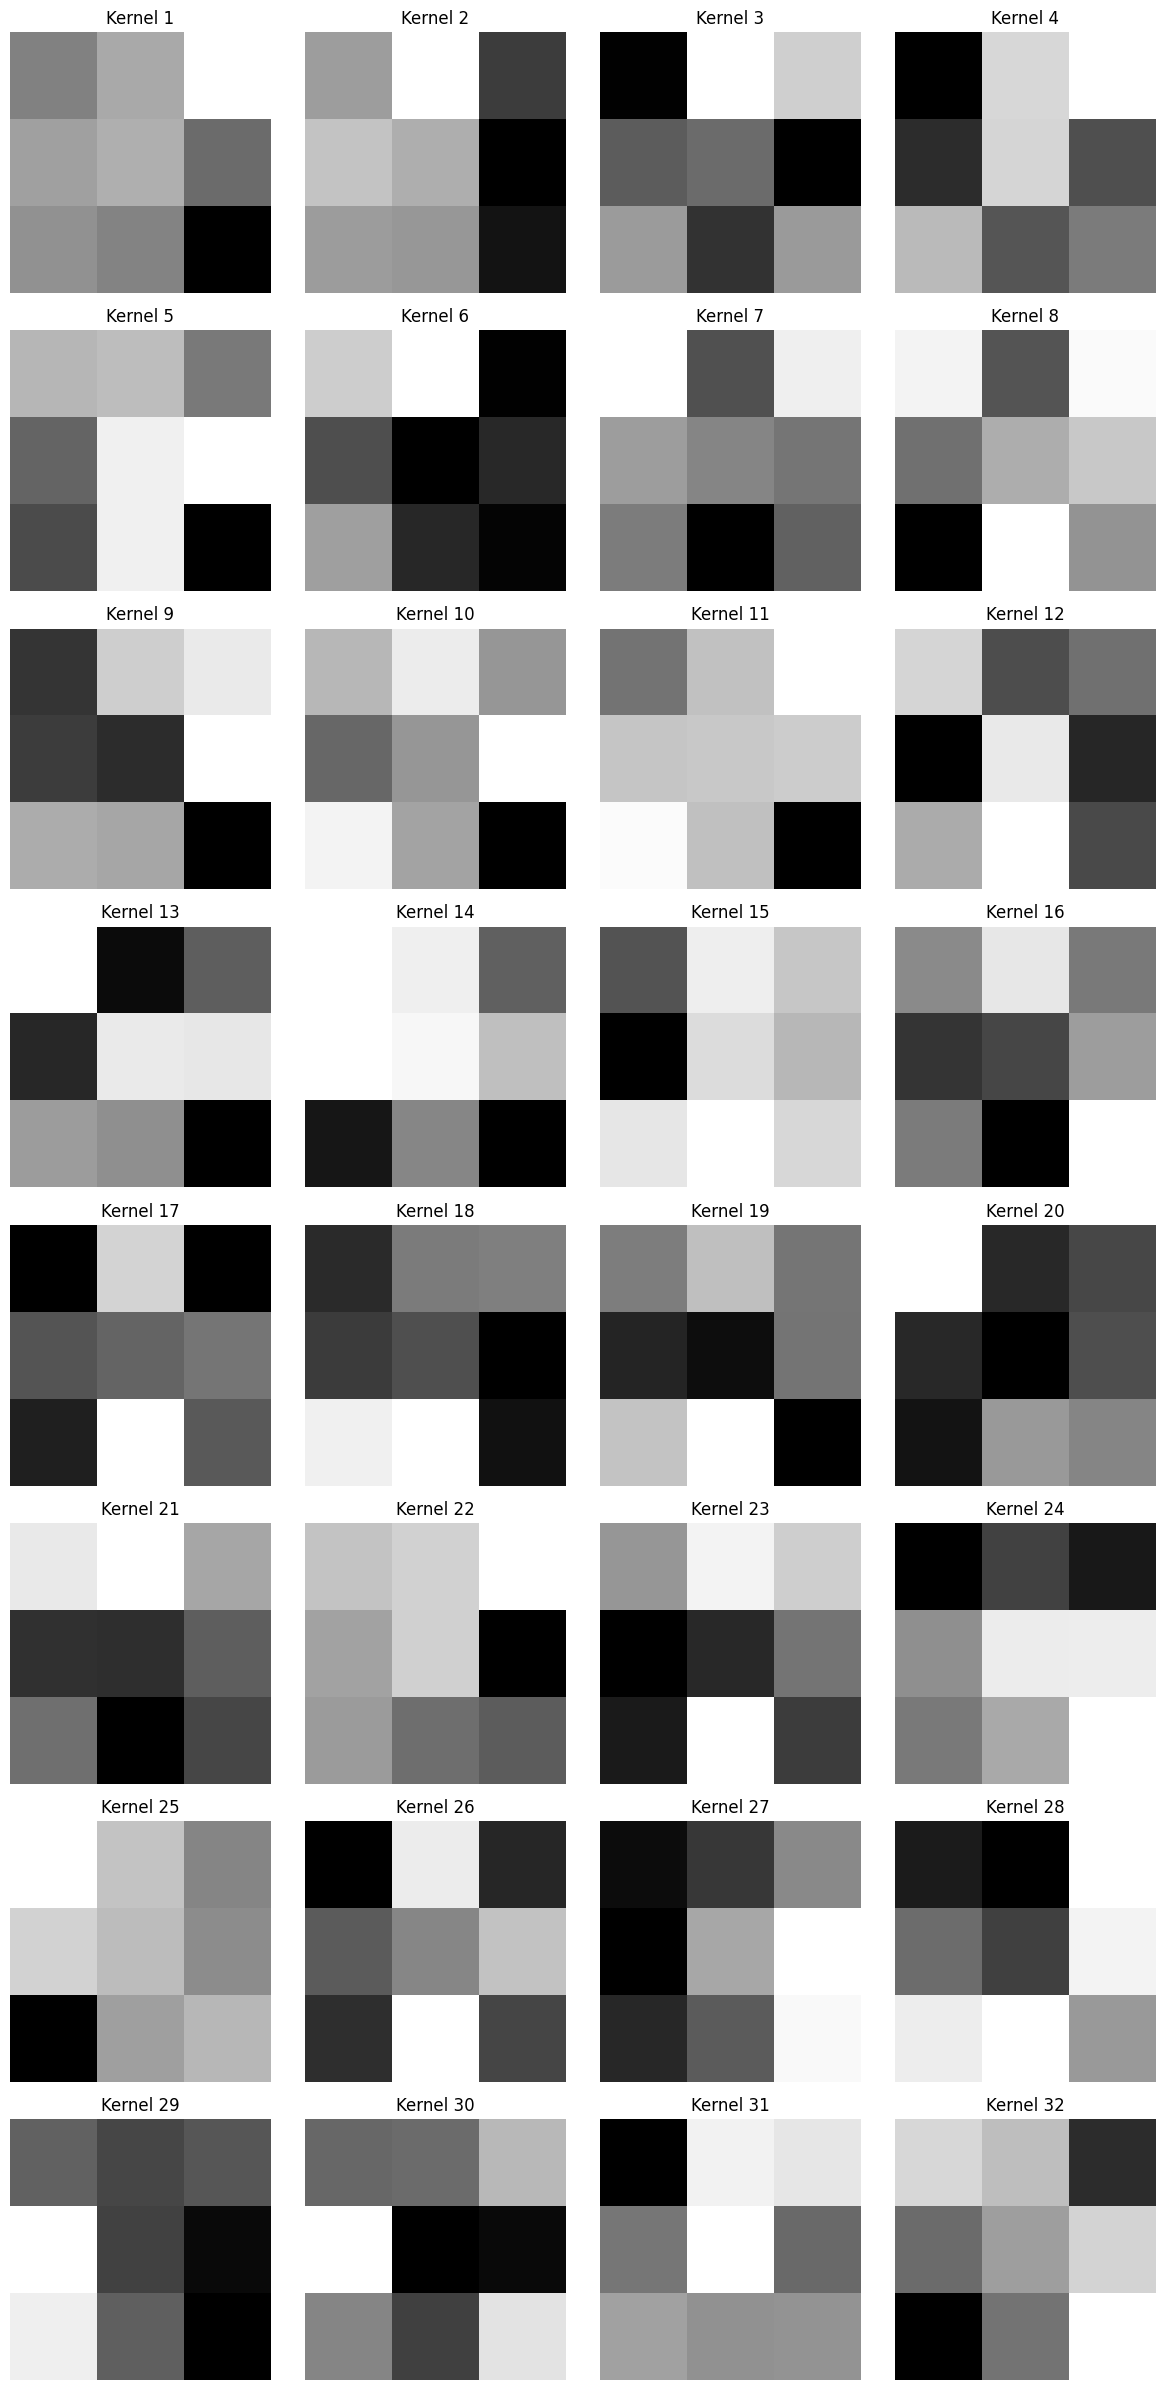

In [ ]:
visualize_first_layer_kernels(duelingdqn_agent.model)


# Archive

## train attempt DQN

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
model_type = DQN()
gamma = 0.99
learning_rate = 0.001
decay_rate = 0.99995
total_episodes = 60000
dqn_agent = DQNAgent(model_type, device, gamma, learning_rate, decay_rate, env, total_episodes)

Computed fc_input_size: 4096
Computed fc_input_size: 4096


100%|██████████| 60000/60000 [3:13:32<00:00,  5.17it/s]


current_epsilon: 0.03
Model saved to /content/dqn_model_12022025_215637.pkl
Model saved to /content/drive/MyDrive/Studies/RL_Final_assignment/dqn_model_12022025_215637.pkl


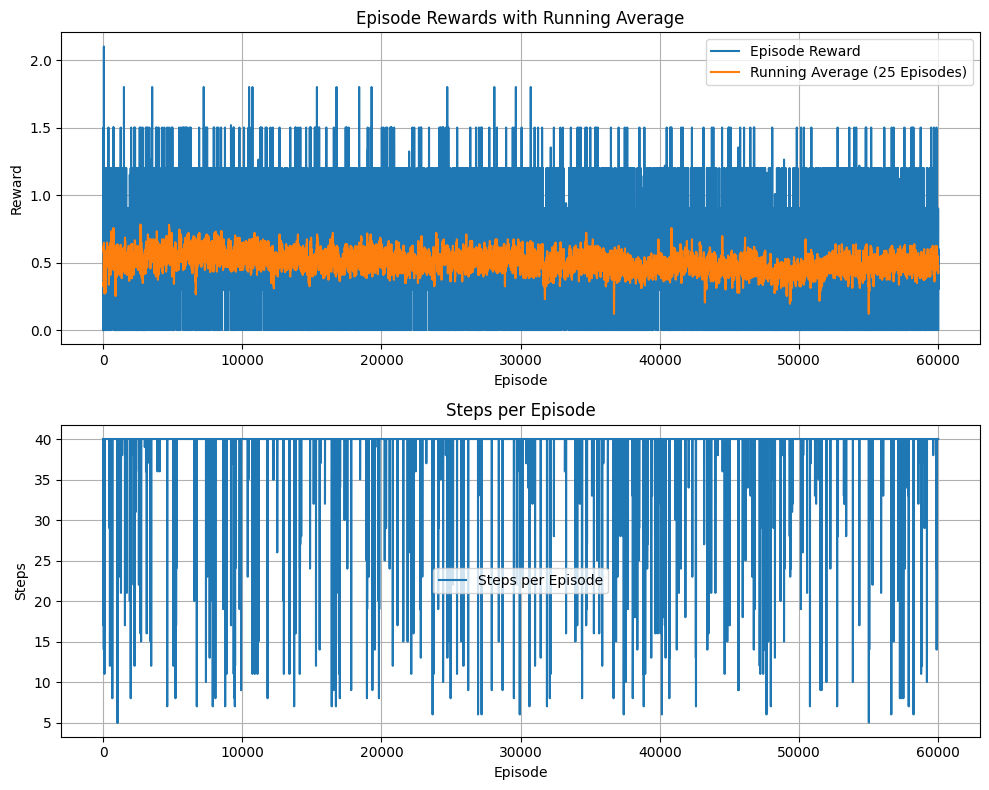

In [ ]:
dqn_agent.train()
print(f'current_epsilon: {dqn_agent.epsilon}')

timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
file_name = f'dqn_model_{timestamp}.pkl'
dqn_agent.save_model(f'/content/{file_name}')
dqn_agent.save_model(f'/content/drive/MyDrive/Studies/RL_Final_assignment/{file_name}')

# print(dqn_agent.rewards)
# print(dqn_agent.steps)
plot_rewards_and_steps(dqn_agent.rewards, dqn_agent.steps)